<h1 style="margin:0; line-height:1.5; padding:0;">Intro to Computational Thinking and Programming - Group 4</h1>
<p style="margin:0;line-height:1; padding:0; font-size:20px;">Team Allocation Simulator</p>
<h5 style="margin:0; margin-top:10px; line-height:1; padding:0; padding-top:10px; color:rgba(231, 60, 60, 1); text-decoration: underline; font-weight:bold; margin-bottom:5px; padding-bottom:5px;">Objective:</h5>
<li>School Affliation: No majority of students from the same school</li>
<li>Gender: No majority of students of the same gender</li>
<li>Current CGPA: To balance academic performance</li>
<h5 style="margin:0; margin-top:10px; line-height:1; padding:0; padding-top:10px; color:rgba(93, 248, 36, 1); text-decoration: underline; font-weight:bold; margin-bottom:10px; padding-bottom:10px;">Computational Thinking used:</h5>
<table>
    <thead>
        <tr>
            <th>Stage/Action</th>
            <th>Computational Thinking Principle</th>
            <th>Justification</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Data Loading, Summarizing, Grouping</td>
            <td>Decomposition</td>
            <td>Breaks down task into smaller manageable parts(subproblems)</td>
        </tr>
        <tr>
            <td>Focus on only relevant student data</td>
            <td>Abstraction</td>
            <td>Ignores unimportant data for clarity and to reduce complexity</td>
        </tr>
        <tr>
            <td>Sorting, counting, plotting default/optimized data</td>
            <td>Pattern Recognition</td>
            <td>Recognizes a pattern that spots similarities and differences between problems </td>
        </tr>
        <tr>
            <td>Applying sorting, drafting, optimization</td>
            <td>Algorithmic Thinking</td>
            <td>Solution as step-by-step algorithms</td>
        </tr>
    </tbody>
</table>

In [56]:
import math
import random
import copy
import os

import csv
import json

from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets
from IPython.display import display, clear_output

path='records.csv'

***
***

## <u><b>DATA ANALYSIS</b></u>

 <h5 style="text-decoration:underline; margin:0; padding:0; line-height:1; font-weight:bold;">Reading and Sorting Data</h5>
        <p>Define a function called <b>tut_grp_json</b> that reads data from the <b>records.csv file</b> and creates a <b>student_data.json file</b> that contains the students details sorted based on their tutorial group in a numerical order and from highest to lowest GPA</p>
       <b style="line-height:.5; margin:0; padding:0;"><u>Pseudocode:</u></b>
        <p style="line-height: 2; margin:0; padding:0;">Function Name: tut_grp_json</p>
        <p style="line-height: 2; margin:0; padding:0;">Parameters: path</p>
        <p style="line-height: 2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Local Variables: </p>
        <ul>
            <li>json_filename(name of json file)</li>
            <li>data(where student data stored)</li> 
            <li>fObj(file)</li>
            <li>reader(data from records.csv)</li>
            <li>row(separate rows of records.csv)</li>
            <li>key(key of data dictionary)</li>
            <li>sorted_by_gpa(data with gpa sorted)</li>
            <li>key_list(where list of keys stored)</li>
            <li>student_data(sorted student data stored)</li>
       </ul>
       <p style="line-height: 2; margin:0; padding:0;">Return Value: student_data.json file name</p>
       <p style="line-height: 1; margin-bottom:-10px; padding-bottom: -10px;">Steps: </p>
        <ol>
           <li>Append .json to <b>json_filename</b></li>
           <li>create empty dicitonary to store data from records.csv</li>
           <li>Open and read records.csv</li>
           <li>Use DictReader, a class from csv library to read data in records.csv</li>
           <li>For each row in records.csv:</li>
           <ol>
               <li>Extract "Tutorial Group" from row to be used as key of dictionary</li>
               <ul>
                   <li>If <b>key</b> not in <b>data</b>: Create new list with row as first item</li>
                   <li>Else append row to existing list of the existing key</li>
               </ul>
           </ol>
           <li>Sort Students by CGPA:</li>
           <ol>
            <ul>
                <li>Loop through each group in the data.</li>
                <li>Sort the list of students for that group by their CGPA, highest first</li>
                <li>Update the group's student list with the sorted result.</li>
            </ul>
           </ol>
           <li>Sort tutorial group numerically:</li>
           <ol>
               <li>Create an empty list(key_list) to store numerical value of tutorial groups</li>
               <ul>
                   <li>Split each key in <b>data</b> by <b>"-"</b> and add the separated tutorial group number to <b>key_list</b></li>
                   <li>Use the sort method to sort values in key_list in numerical order</li>
                   <li>Concantate the letter G to all numerical values (e.g. G-1) in key_list</li>
               </ul>
           </ol>
               <li>Store the sorted data into a new dictionary(student_data) with tutorial groups being the key of each item of the dictionary</li>
               <li>Write student_data into tut_grp.json file</li>
               <li>Return json file back to global variable(json_file)</li>
       </ol>
       


In [57]:
def tut_grp_json(path: str): #path: takes in filepath of csv file; json_filename: specify the file name of the json file without the filetype
    json_filename='student_data.json'
    data={} #overall data
    with open(path,'r',newline='') as fObj:
        reader=csv.DictReader(fObj)
        for row in reader:
            gpa=row["CGPA"]
            row["CGPA"]=float(gpa)
            key=row.pop('Tutorial Group') #remove the tutorial group from the row and store the variable
            if key not in data:
                data[key]=[row] #the value of data[key] is a list; if key not in, create new key
            else:
                data[key].append(row) #if key already exist, append to the existing list corresponding to the key
    
    ###sort students per in tut grp from lowest to highest gpa
    for key in data:
        sorted_by_gpa=sorted(data[key],key=lambda student: student['CGPA'],reverse=True) #sort all the students according to cgpa
        data[key]=sorted_by_gpa

    ###sorting out the keys to make sure they are in order
    key_list=[]
    for key,student_info in data.items():
        key_list.append(int(key.split('-')[1])) #split string at '-'.
        key_list.sort() #sort from 1-120 in numerical order because python does not sort 'G-xx' in numerical order
    def myFunc(i):
        return 'G-'+str(i)
    key_list=list(map(myFunc,key_list))
    student_data = {key: data[key] for key in key_list}

    ###writing the the student_data object into a json file
    with open(json_filename,'w') as fObj:
        #json file cannot be modifiable
        json.dump(student_data,fObj,indent=2) #write to json file so the sorted dictionary cannot be accidentally messed up
    return json_filename

<h5 style="line-height:.5; margin:0; padding:0; font-weight:bold;">Why .json?</h5>
<p>As data stored in a .json file cannot be modified. Thus, ensuring that data is not modified while being used in the program.</p>
<h5 style="text-decoration:underline; line-height:1; margin:20px 0 0 0; padding:20px 0 0 0; font-weight:bold;">Loading Sorted Data into Python Program</h5>
<p>Define a function called <b>load_json_to_dict</b> that returns sorted data from a .json file to store data in a dictionary, where function was called</p>
<b style="line-height:.5; margin:0; padding:0;"><u>Pseudocode:</u></b> 
<p style="line-height: 1.5; margin:0; padding:0;">Function Name: load_json_to_dict</p>
<p style="line-height: 2; margin:0; padding:0;">Parameters: json_file</p>
<p style="line-height: 2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Local Variables: </p>
<ul>
    <li>fObj(file)</li>
    <li>values(store loaded data from json file)</li> 
</ul>
<p style="line-height: 2; margin:0; padding:0;">Return Value: Data from json file</p>
<p style="line-height: 1; margin-bottom:-10px; padding-bottom: -10px;">Steps: </p>
<ol>
    <li>If ".json" is not included in json_file, add .json to json_file</li>
    <li>Open json_file and read the data in it</li>
    <li>Load the data from the json_file into values, then return it back to where the load_json_to_dict was called</li>
</ol>

In [58]:
def load_json_to_dict(json_file: str): #loads json file to a dictionary and returns a dictionary
    if '.json' not in json_file:
        json_file+='.json'
    with open(json_file,'r') as jFileObj:
        values=json.load(jFileObj)
    return values

In [59]:
json_student_data=tut_grp_json(path) #filepath to read to load student_data.json

<h5 style="text-decoration:underline; line-height:1; margin: 0; padding: 0; font-weight:bold;">Summarised data</h5>
<p>Define a function called <b>summarise_data_json</b> that collates the number of students in specific school and their gender for each tutorial group. Then, write it into a .json file.</p>
<b style="line-height:.5; margin:0; padding:0;"><u>Pseudocode:</u></b>
<p style="line-height: 1.5; margin:0; padding:0;">Function Name: summarise_data_json</p>
<p style="line-height: 2; margin:0; padding:0;">Parameters: json_student_data (path to student data JSON file)</p>
<p style="line-height: 2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Local Variables:</p>
<ul>
    <li>student_data (dictionary containing data loaded from JSON)</li>
    <li>json_filename (name of output file)</li>
    <li>data_set (dictionary to store summary statistics)</li>
    <li>schools (set to store unique school names)</li>
    <li>genders (set to store unique gender values)</li>
    <li>summary_stats (dictionary for statistics per tutorial group)</li>
</ul>
<p style="line-height: 2; margin:0; padding:0;">Return Value: summarise_data.json file name</p>
<p style="line-height: 1; margin-bottom:-10px; padding-bottom: -10px;">Steps:</p>
<ol>
    <li>Input Validation:</li>
    <ul>
        <li>Check if input file is 'student_data.json', raise ValueError if not</li>
    </ul>
    <li>Initialize:</li>
    <ul>
        <li>Load student data from JSON file using load_json_to_dict</li>
        <li>Set output filename to 'summarised_data.json'</li>
        <li>Create empty dictionary data_set</li>
    </ul>
    <li>Collect Unique Values:</li>
    <ul>
        <li>Create empty sets for schools and genders</li>
        <li>For each tutorial group in student_data:</li>
        <ul>
            <li>Extract unique schools using map and set</li>
            <li>Extract unique genders using map and set</li>
            <li>Update master sets using union operation</li>
        </ul>
    </ul>
    <li>Process Each Tutorial Group:</li>
    <ul>
        <li>For each tutorial group in student_data:</li>
        <ol>
            <li>Create empty summary_stats dictionary</li>
            <li>Calculate GPA statistics:</li>
            <ul>
                <li>Extract all CGPA values into list</li>
                <li>Store in summary_stats['CGPA']</li>
            </ul>
            <li>Calculate School statistics:</li>
            <ul>
                <li>Get list of all schools in group</li>
                <li>Count occurrences of each unique school</li>
                <li>Store counts in dictionary format</li>
            </ul>
            <li>Calculate Gender statistics:</li>
            <ul>
                <li>Get list of all genders in group</li>
                <li>Count occurrences of each gender</li>
                <li>Store counts in dictionary format</li>
            </ul>
            <li>Store total student count</li>
            <li>Add all statistics to data_set under tutorial group key</li>
        </ol>
    </ul>
    <li>Save Results:</li>
    <ul>
        <li>Write data_set to JSON file with indentation</li>
        <li>Return filename of created JSON file</li>
    </ul>
</ol>

<p>Example Output Structure:</p>
<pre style="background-color:black;padding:10px;border-radius:5px;">
{
    "G-1": {
        "CGPA": [3.5, 3.2, 3.8, ...],
        "Schools": {
            "SCSE": 10,
            "NBS": 5,
            ...
        },
        "Genders": {
            "Male": 8,
            "Female": 7
        },
        "Count": 15
    },
    ...
}
</pre>

In [60]:
def summarise_data_json(json_student_data): #student_data is dictionary objects of student info sorted via tutorial group, dictionary should be loaded via json.load()  
    if json_student_data!='student_data.json':
        raise ValueError

    student_data=load_json_to_dict(json_student_data)
    
    json_filename= 'summarised_data.json'
    data_set={}

    ###sum up all possible faculties and gender
    schools=set()
    genders=set()
    for tut_grp,tut_data in student_data.items(): 
        grp_set=set(map(lambda student: student['School'], tut_data))
        gender_set=set(map(lambda student: student['Gender'], tut_data))
        schools|=grp_set #keep updating the set 'schools' to check how many schools are there in total
        genders|=gender_set
    
    ###sorting the numerical data via tutorial group
    for tut_grp,tut_data in student_data.items(): #tut_data is a list of dictionary object of student info
        summary_stats={}
        ###gpa data
        gpa_list=list(map(lambda student : student["CGPA"], tut_data )) #each iterable stored in the list (dictionary of student info) will be passed thru lambda function
        summary_stats['CGPA']=gpa_list
        
        ###faculty data
        all_schools=list(map(lambda student : student['School'], tut_data))
        def count_sch(sch):
            return (sch,all_schools.count(sch))
        school_tuple=tuple(map(count_sch,schools)) #schools is a set
        school_dict=dict(school_tuple)
        summary_stats['Schools']=school_dict

        ###gender data
        all_genders=list(map(lambda student : student['Gender'], tut_data))
        def count_gender(gender):
            return (gender,all_genders.count(gender))
        gender_tuple=tuple(map(count_gender,genders)) #genders is a set
        gender_dict=dict(gender_tuple) 
        summary_stats['Genders']=gender_dict

        ###count of students
        summary_stats['Count']=len(gpa_list)

        data_set[tut_grp]=summary_stats
        #The dict() constructor builds dictionaries directly from iterable sequences of key-value pairs
        #https://docs.python.org/3/tutorial/datastructures.html#dictionaries

    
    with open(json_filename,'w') as fObj:
        json.dump(data_set,fObj,indent=2)
    
    return json_filename

In [61]:
json_summarised_data=summarise_data_json(json_student_data) #filepath to read to load summarised_data.json

<h5 style="text-decoration:underline; line-height:1; margin: 0; padding: 0; font-weight:bold;">Select Tutorial Groups</h5>
<p>Define a function called <b>tut_grp_select</b> that extracts data from specific tutorial group numbers. Limited to maximum 8 groups for visualization purposes.</p>
<b style="line-height:.5; margin:0; padding:0;"><u>Pseudocode:</u></b>
<p style="line-height: 1.5; margin:0; padding:0;">Function Name: tut_grp_select</p>
<p style="line-height: 2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Parameters:</p>
<ul>
    <li>data_dict: Dictionary containing tutorial group data (can be from summarised_data.json or student_data.json)</li>
    <li>selected_keys: Tuple of tutorial group keys to extract (e.g., ('G-1', 'G-2'))</li>
</ul>
<p style="line-height: 2; margin:0; padding:0;">Return Value: Dictionary containing only the selected tutorial groups' data</p>

<p style="line-height: 1; margin-bottom:-10px; padding-bottom: -10px;">Steps:</p>
<ol>
    <li>Input Validation:</li>
    <ul>
        <li>Check if number of selected_keys is greater than 8</li>
        <li>If true, raise ValueError (too many groups selected)</li>
    </ul>
    <li>Create New Dictionary:</li>
    <ul>
        <li>Use dictionary comprehension to create new dictionary</li>
        <li>For each key in selected_keys:</li>
        <ul>
            <li>Copy the corresponding data from data_dict[key]</li>
            <li>Use same key in new dictionary</li>
        </ul>
    </ul>
    <li>Return filtered dictionary containing only selected groups</li>
</ol>

<p>Example Usage:</p>
<pre style="background-color:black;padding:10px;border-radius:5px;">
Input:
- data_dict = {
    "G-1": {...},
    "G-2": {...},
    "G-3": {...}
  }
- selected_keys = ("G-1", "G-3")

Output:
{
    "G-1": {...},
    "G-3": {...}
}
</pre>

In [62]:
def tut_grp_select(data_dict: dict,selected_keys: tuple): #data_dict can be either summarised data or overall grp data; selected_keys is the selection of tutorial groups in list form, cannot contain more then 8 groups
    if len(selected_keys)>8:
        raise ValueError
    return {key: data_dict[key] for key in selected_keys} #dictionary comprehension

<h5 style="text-decoration:underline; line-height:1; margin: 0; padding: 0; font-weight:bold;">Extract CGPA for Plotting</h5>
<p>Define a function called <b>sort_data_by_CGPA</b> that extracts CGPA data from the summarised file into a format suitable for plotting.</p>
<b style="line-height:.5; margin:0; padding:0;"><u>Pseudocode:</u></b>
<p style="line-height: 1.5; margin:0; padding:0;">Function Name: sort_data_by_CGPA</p>
<p style="line-height: 2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Parameters:</p>
<ul>
    <li>stat_data: Dictionary containing tutorial group statistics (from summarised_data.json)</li>
</ul>
<p style="line-height: 2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Return Values:</p>
<ul>
    <li>data: Tuple of CGPA lists, one list per tutorial group</li>
    <li>axes_labels: Tuple of tutorial group names (e.g., "G-1", "G-2", etc.)</li>
</ul>

<p style="line-height: 1; margin-bottom:-10px; padding-bottom: -10px;">Steps:</p>
<ol>
    <li>Create Tutorial Group Labels:</li>
    <ul>
        <li>Extract all tutorial group names from stat_data keys</li>
        <li>Convert to tuple to ensure order is preserved</li>
        <li>Store in axes_labels</li>
    </ul>
    <li>Extract CGPA Data:</li>
    <ul>
        <li>For each tutorial group in axes_labels:</li>
        <ul>
            <li>Get the CGPA list from stat_data[tut_grp]['CGPA']</li>
            <li>Maintain same order as axes_labels</li>
        </ul>
        <li>Convert list of CGPA lists to tuple</li>
        <li>Store in data</li>
    </ul>
    <li>Return both tuples:</li>
    <ul>
        <li>Return (data, axes_labels) as a tuple</li>
        <li>Ensures CGPA data and labels remain aligned</li>
    </ul>
</ol>

<p>Example Usage:</p>
<pre style="background-color:black;padding:10px;border-radius:5px;">
Input stats_data:
{
    "G-1": {
        "CGPA": [3.5, 3.2, 3.8],
        ...
    },
    "G-2": {
        "CGPA": [3.9, 3.1, 3.4],
        ...
    }
}

Output:
data = ([3.5, 3.2, 3.8], [3.9, 3.1, 3.4])
axes_labels = ("G-1", "G-2")
</pre>

In [63]:
def sort_data_by_CGPA(stat_data: dict): #used to sort out data by just gpa

    ###labels and data for box_plot or any other forms of data
    axes_labels=tuple([tut_grp for tut_grp in stat_data.keys()])
    data=tuple([stat_data[tut_grp]['CGPA'] for tut_grp in axes_labels]) #make sure each gpa list corresponds to the axes_labels index
    
    return data,axes_labels

<h5 style="text-decoration:underline; line-height:1; margin: 0; padding: 0; font-weight:bold;">Boxplot all Tutorial Groups</h5>
<p>Define a function called <b>boxplot_all_tut_grps</b> that reads the summarised data file and draws a grid of boxplots (one per tutorial group).</p>
<b style="line-height:.5; margin:0; padding:0;"><u>Pseudocode:</u></b>
<p style="line-height: 1.5; margin:0; padding:0;">Function Name: boxplot_all_tut_grps</p>
<p style="line-height: 2; margin:0; padding:0;">Parameters: json_summarised_data — path / filename for summarised_data.json</p>
<p style="line-height: 2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Local Variables:</p>
<ul>
  <li><b>stats_data</b> (dict) — result of <code>load_json_to_dict</code>; mapping tutorial group → summary dict (contains 'CGPA', 'Schools', 'Genders', 'Count').</li>
  <li><b>fig</b> (matplotlib.figure.Figure) — the Figure created by <code>plt.subplots</code>.</li>
  <li><b>axes</b> (ndarray of Axes) — 2D array of subplot Axes (shape nrows×ncols; here 4×3).</li>
  <li><b>data</b> (tuple[list[float]]) — sequence of CGPA lists returned by <code>sort_data_by_CGPA</code>.</li>
  <li><b>axes_x</b> (tuple[str]) — matching tutorial-group labels (e.g., 'G-1', 'G-2', ...).</li>
  <li><b>start</b> (int) — start index for the current slice of groups (initially 0).</li>
  <li><b>end</b> (int) — end index (exclusive) for the current slice of groups (initially 10).</li>
  <li><b>row</b> (int) — loop index for subplot row (0..nrows-1).</li>
  <li><b>col</b> (int) — loop index for subplot column (0..ncols-1).</li>
  <li><b>plot_data</b> (tuple[list[float]]) — the sliced subset of <code>data</code> for the current subplot (<code>data[start:end]</code>).</li>
  <li><b>labels_data</b> (tuple[list[str]]) — the sliced subset of <code>axes_x</code> for the current subplot (<code>axes_x[start:end]</code>).</li>
  <li><b>df</b> (dict[str, list[float]]) — mapping label → CGPA list built via <code>dict(zip(labels_data, plot_data))</code> and passed to seaborn.</li>
  <li><b>sns</b>, <b>plt</b> — external plotting modules (seaborn, matplotlib) used for plotting and layout/display.</li>
  <li><b>load_json_to_dict</b>, <b>sort_data_by_CGPA</b> — helper functions invoked by this function (referenced but not defined locally).</li>
</ul>
<p style="line-height: 2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Steps:</p>
<ol>
  <li>Input validation:
    <ul>
      <li>If json_summarised_data is not 'summarised_data.json', raise ValueError.</li>
    </ul>
  </li>
  <li>Load data:
    <ul>
      <li>Call load_json_to_dict(json_summarised_data) to get stats_data (a dict keyed by tutorial group).</li>
    </ul>
  </li>
  <li>Prepare figure:
    <ul>
      <li>Create a matplotlib figure with subplots arranged 4 rows × 3 columns (12 axes total).</li>
    </ul>
  </li>
  <li>Prepare plotting data:
    <ul>
      <li>Call sort_data_by_CGPA(stats_data) to obtain (data, axes_labels):
        <ul>
          <li>data: tuple of CGPA lists, one per tutorial group.</li>
          <li>axes_labels: tuple of corresponding tutorial group names (e.g., 'G-1', 'G-2', ...).</li>
        </ul>
      </li>
    </ul>
  </li>
  <li>Render boxplots in grid order:
    <ul>
      <li>Initialize start = 0 and end = 10 (plot 10 groups per 4×3 grid cell sequence).
      </li>
      <li>For each row index from 0..3:
        <ul>
          <li>For each col index from 0..2:
            <ul>
              <li>Slice plot_data = data[start:end] and labels_data = axes_labels[start:end].</li>
              <li>Create a dictionary mapping labels → plot_data for this subplot.</li>
              <li>Call seaborn.boxplot(data=df, ax=axes[row,col]) to draw boxplots for these groups.</li>
              <li>Call seaborn.stripplot(...) to dislay individual points(CGPA).</li>
              <li>Increment start and end by 10 for the next subplot.</li>
            </ul>
          </li>
        </ul>
      </li>
    </ul>
  </li>
  <li>Finalize and show:
    <ul>
      <li>Call plt.tight_layout() to adjust spacing.</li>
      <li>Call plt.show() to display the figure.</li>
    </ul>
  </li>
</ol>

In [64]:
def boxplot_all_tut_grps(json_summarised_data): #filepath to summarised_data.json
    if json_summarised_data!='summarised_data.json':
        raise ValueError
    stats_data=load_json_to_dict(json_summarised_data)
    fig, axes=plt.subplots(nrows=4,ncols=3) #4x3 subplots
    
    ###plot box
    data,axes_x=sort_data_by_CGPA(stats_data)
    start=0
    end=10
    for row in range(4):
        for col in range(3):
            plot_data=data[start:end]
            labels_data=axes_x[start:end]
            df=dict(zip(labels_data,plot_data))
            sns.boxplot(data=df,ax=axes[row,col]) #plotting 10 values per box
            sns.stripplot(data=df,ax=axes[row,col],color='black',alpha=0.35)
            #axes[row,col]
            start+=10
            end+=10

    ###show box plot
    plt.tight_layout()
    plt.show()

<h5 style="text-decoration:underline; line-height:1; margin: 0; padding: 0; font-weight:bold;">Boxplot some Tutorial Groups</h5>
<p>Define a function called <b>boxplot_some_tut_grps</b> that draws boxplots for a user-selected subset of tutorial groups from the summarised data.</p>
<b style="line-height:.5; margin:0; padding:0;"><u>Pseudocode:</u></b>
<p style="line-height: 1.5; margin:0; padding:0;">Function Name: boxplot_some_tut_grps</p>
<p style="line-height: 2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Parameters:</p>
<ul>
    <li>json_summarised_data — path/filename for summarised_data.json</li>
    <li>selected_keys — tuple of tutorial group keys to plot (e.g. ('G-1','G-6'))</li>
</ul>
<p style="line-height: 2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Local Variables:</p>
<ul>
    <li><b>all_data</b> (dict) — full summarised data loaded by <code>load_json_to_dict</code>.</li>
    <li><b>stat_data</b> (dict) — filtered summarised data returned by <code>tut_grp_select</code> for the selected groups.</li>
    <li><b>data</b> (tuple[list[float]]) — sequence of CGPA lists returned by <code>sort_data_by_CGPA</code> for the selected groups.</li>
    <li><b>axes_x</b> (tuple[str]) — matching tutorial-group labels for the selected groups.</li>
    <li><b>df</b> (dict[str, list[float]]) — mapping label → CGPA list built via <code>dict(zip(axes_x, data))</code> and passed to seaborn.</li>
    <li><b>sns</b>, <b>plt</b> — external plotting modules (seaborn, matplotlib) used to draw plots and manage display.</li>
    <li><b>load_json_to_dict</b>, <b>tut_grp_select</b>, <b>sort_data_by_CGPA</b> — helper functions invoked by this function (referenced but not defined locally).</li>
</ul>
<p style="line-height: 2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Steps:</p>
<ol>
  <li>Input validation:
    <ul>
      <li>If json_summarised_data is not 'summarised_data.json', raise ValueError.</li>
    </ul>
  </li>
  <li>Load data:
    <ul>
      <li>Call load_json_to_dict(json_summarised_data) to get all_data (dictionary keyed by tutorial group).</li>
    </ul>
  </li>
  <li>Select groups:</li>
    <ul>
      <li>Call tut_grp_select(all_data, selected_keys) to produce stat_data containing only chosen groups.</li>
    </ul>
  </li>
  <li>Prepare plotting data:</li>
    <ul>
      <li>Call sort_data_by_CGPA(stat_data) to get (data, axes_labels):
        <ul>
          <li>data: tuple of CGPA lists for the selected groups.</li>
          <li>axes_labels: tuple of selected group names in the same order.</li>
        </ul>
      </li>
      <li>Create a mapping (dictionary) from label → CGPA list, e.g. df = dict(zip(axes_labels, data)).</li>
    </ul>
  </li>
  <li>Plot:
    <ul>
      <li>Call seaborn.boxplot(data=df) to draw boxplots for each selected group on a single axes.</li>
      <li>Call seaborn.stripplot(data=df, color='black', alpha=0.35) to dislay individual datapoints(CGPA).</li>
    </ul>
  </li>
  <li>Finalize:
    <ul>
      <li>Call plt.tight_layout() (optional) to adjust spacing.</li>
      <li>Call plt.show() to display the plot.</li>
    </ul>
  </li>
</ol>

In [65]:
def boxplot_some_tut_grps(json_summarised_data, selected_keys: tuple): #filepath to summarised_data.json
    if json_summarised_data!='summarised_data.json':
        raise ValueError

    all_data=load_json_to_dict(json_summarised_data)
    stat_data=tut_grp_select(all_data,selected_keys)

    ###plot box
    data,axes_x=sort_data_by_CGPA(stat_data)
    df=dict(zip(axes_x,data))
    sns.boxplot(df)
    sns.stripplot(df,color='black',alpha=0.35)

    ###show box plot
    plt.show()

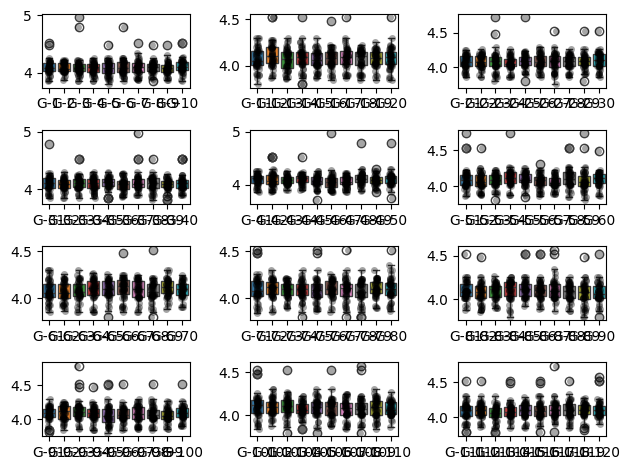

In [66]:
boxplot_all_tut_grps(json_summarised_data)


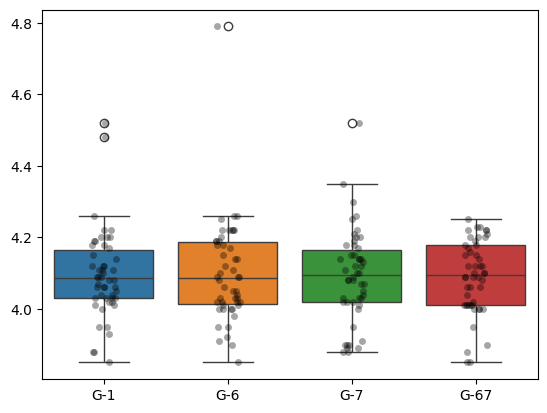

In [67]:
boxplot_some_tut_grps(json_summarised_data,('G-1','G-6','G-7','G-67'))

<h5 style="text-decoration:underline; line-height:1; margin: 0; padding: 0; font-weight:bold;">Sort by Gender</h5>
<p>Define a function called <b>sort_data_by_gender</b> that prepares data for plotting male vs female counts per tutorial group.</p>
<b style="line-height:.5; margin:0; padding:0;"><u>Pseudocode:</u></b>
<p style="line-height:1.5; margin:0; padding:0;">Function Name: sort_data_by_gender</p>
<p style="line-height:1.2; margin:0; padding:0;">Parameters: <code>stats_data</code> — dictionary containing summarised statistics for each tutorial group (from <code>summarised_data.json</code>).</p>
<p style="line-height:1.2; margin:0; padding:0;">Return Values: <code>tut_grp</code>, <code>male</code>, <code>female</code></p>
<p style="line-height:1.2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Local Variables:</p>
<ul>
  <li><b>tut_grp</b> (list[str]) — ordered list of tutorial group labels extracted from <code>stats_data</code>.</li>
  <li><b>male</b> (list[int]) — list of integer counts of male students per corresponding tutorial group.</li>
  <li><b>female</b> (list[int]) — list of integer counts of female students per corresponding tutorial group.</li>
  <li><b>stats_data</b> (dict) — input dictionary; each value is a dict with keys like 'Genders' containing counts.</li>
</ul>
<p style="line-height:1.2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Steps:</p>
<ol>
  <li>Extract tutorial group labels in a stable order: <code>tut_grp = [tut for tut in stats_data]</code>.</li>
  <li>For each tutorial group in <code>stats_data</code>, read the male count from <code>data['Genders']['Male']</code> and collect into the <code>male</code> list.</li>
  <li>Similarly, read the female count from <code>data['Genders']['Female']</code> and collect into the <code>female</code> list.</li>
  <li>Return the three sequences: (<code>tut_grp</code>, <code>male</code>, <code>female</code>), preserving the same ordering.</li>
</ol>
<p style="line-height:1.2; margin:0; padding:0;">Example usage:</p>
<pre style="background-color:black;padding:10px;border-radius:5px;">
stats_data = { 'G-1': {'Genders': {'Male': 8, 'Female': 7}}, 'G-2': {'Genders': {'Male': 5, 'Female': 10}} }
tut_grp, male, female = sort_data_by_gender(stats_data)  # returns (['G-1','G-2'], [8,5], [7,10])
</pre>

In [68]:
def sort_data_by_gender(stats_data: dict): #used to sort out data by just Schools
    ###labels and data for box_plot or any other forms of data
    tut_grp=[tut_grp for tut_grp in stats_data]
    male=[data['Genders']['Male'] for tut_grp,data in stats_data.items()]
    female=[data['Genders']['Female'] for tut_grp,data in stats_data.items()]
    return tut_grp,male,female


<h5 style="text-decoration:underline; line-height:1; margin: 0; padding: 0; font-weight:bold;">Plot Bar for Gender Distribution</h5>
<p>Define a function called <b>plot_bar</b> that creates a grid of bar plots showing gender distribution across tutorial groups.</p>
<b style="line-height:.5; margin:0; padding:0;"><u>Pseudocode:</u></b>
<p style="line-height:1.5; margin:0; padding:0;">Function Name: plot_bar</p>
<p style="line-height:2; margin:0; padding:0;">Parameters: json_summarised_data — path to summarised_data.json file</p>
<p style="line-height:1.2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Local Variables:</p>
<ul>
  <li><b>stats_data</b> (dict) — data loaded from summarised_data.json</li>
  <li><b>tut_grps</b> (list[str]) — tutorial group labels</li>
  <li><b>male</b> (list[int]) — count of male students per group</li>
  <li><b>female</b> (list[int]) — count of female students per group</li>
  <li><b>fig</b>, <b>axes</b> — matplotlib figure and 4×3 grid of axes</li>
  <li><b>start</b>, <b>end</b> (int) — indices for slicing data into groups of 10</li>
  <li><b>row</b>, <b>col</b> (int) — loop indices for subplot grid</li>
  <li><b>indx</b> (ndarray) — array of x-coordinates for bars</li>
  <li><b>bar_width</b> (float) — width of each bar (0.25)</li>
  <li><b>male_bar</b>, <b>female_bar</b> — bar plot objects for legend</li>
</ul>

<p style="line-height:1.2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Steps:</p>
<ol>
  <li>Load and process data:
    <ul>
      <li>Load stats_data from json_summarised_data file</li>
      <li>Extract tutorial groups and gender counts using sort_data_by_gender</li>
    </ul>
  </li>
  <li>Create plot layout:
    <ul>
      <li>Initialize figure with 4×3 grid of subplots</li>
      <li>Set initial start=0 and end=10 for data slicing</li>
    </ul>
  </li>
  <li>Plot data in grid:
    <ul>
      <li>For each row (0 to 3):
        <ul>
          <li>For each column (0 to 2):
            <ul>
              <li>Generate x-coordinates array for current group slice</li>
              <li>Set x-axis ticks and labels for tutorial groups</li>
              <li>Plot male bars offset left by bar_width/2</li>
              <li>Plot female bars offset right by bar_width/2</li>
              <li>Increment start and end by 10 for next subplot</li>
            </ul>
          </li>
        </ul>
      </li>
    </ul>
  </li>
  <li>Finalize plot:
    <ul>
      <li>Add legend showing male and female bars</li>
      <li>Adjust layout spacing</li>
      <li>Display the plot</li>
    </ul>
  </li>
</ol>

<p style="line-height:1.2; margin:0; padding:0;">Example output:</p>
<pre style="background-color:black;padding:10px;border-radius:5px;">
Figure with 4×3 grid of subplots where each subplot shows:
- X-axis: Tutorial group labels (e.g., 'G-1', 'G-2', etc.)
- Y-axis: Number of students
- Two bars per group:
  * Blue bar (left): Male count
  * Orange bar (right): Female count
Legend indicating male/female bars
</pre>

In [69]:
def plot_bar(json_summarised_data):
    stats_data=load_json_to_dict(json_summarised_data)
    tut_grps,male,female=sort_data_by_gender(stats_data)

    fig, axes=plt.subplots(nrows=4,ncols=3)

    ###plot box
    start=0
    end=10
    for row in range(4):
        for col in range(3):

            tick_lst=[x for x in range(len(tut_grps[start:end]))]
            axes[row,col].set_xticks(tick_lst,tut_grps[start:end])
            bar_width=0.25
            male_tick=list(map(lambda x:x-bar_width/2,tick_lst))
            female_tick=list(map(lambda x:x+bar_width/2,tick_lst))

            male_bar=axes[row,col].bar(male_tick,male[start:end],width=bar_width,label='Male',)
            female_bar=axes[row,col].bar(female_tick,female[start:end],width=bar_width,label='Female')

            start+=10
            end+=10

    fig.legend([male_bar,female_bar],['Male','Female'])
    ###show box plot
    plt.tight_layout()
    plt.show()

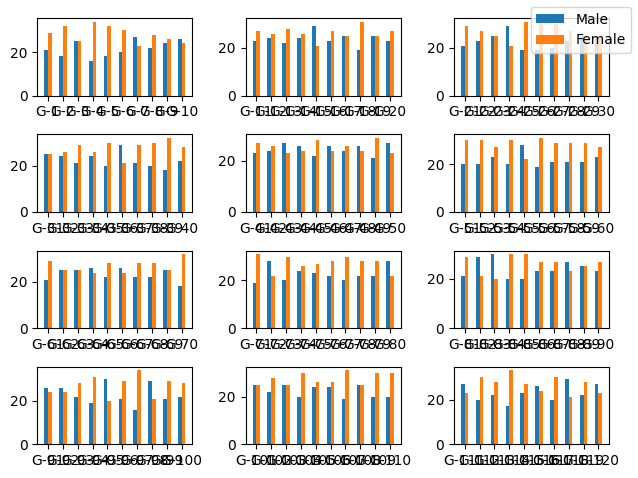

In [70]:
plot_bar(json_summarised_data)

<h5 style="text-decoration:underline; line-height:1; margin: 0; padding: 0; font-weight:bold;">Sort Data by School</h5>
<p>Define a function called <b>sort_data_by_school</b> that extracts and organizes student count data by schools across tutorial groups from a provided dataset.</p>
<b style="line-height:.5; margin:0; padding:0;"><u>Pseudocode:</u></b>
<p style="line-height:1.5; margin:0; padding:0;">Function Name: sort_data_by_school</p>
<p style="line-height:2; margin:0; padding:0;">Parameters: stat_data — a dictionary containing statistical data keyed by tutorial groups</p>
<p style="line-height:1.2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Local Variables:</p>
<ul>
  <li><b>data_lst</b> (list) — stores processed data for each tutorial group</li>
  <li><b>tut_grp</b> (str) — current tutorial group key</li>
  <li><b>values</b> (dict) — data associated with the tutorial group</li>
  <li><b>school_data</b> (dict) — sub-dictionary of schools and their counts for the tutorial group</li>
  <li><b>sch_label</b> (list) — list to store non-zero school labels</li>
  <li><b>size</b> (list) — list to store counts corresponding to schools in sch_label</li>
</ul>

<p style="line-height:1.2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Steps:</p>
<ol>
  <li>Initialize an empty list <b>data_lst</b> to store processed data.</li>
  <li>Loop through each item in <b>stat_data</b>:
    <ul>
      <li>Extract the tutorial group key as <b>tut_grp</b> and its associated values.</li>
      <li>Retrieve the <b>'Schools'</b> dictionary from the values as <b>school_data</b>.</li>
      <li>Initialize empty lists <b>sch_label</b> and <b>size</b> to hold non-zero schools and counts.</li>
      <li>Loop over each school and its count in <b>school_data</b>:
        <ul>
          <li>If count is not zero, append the school to <b>sch_label</b> and count to <b>size</b>.</li>
        </ul>
      </li>
      <li>Create a dictionary with keys: <b>'Tut_grp'</b>, <b>'Label'</b>, and <b>'Size'</b> holding tutorial group, list of schools, and counts respectively.</li>
      <li>Append this dictionary to <b>data_lst</b>.</li>
    </ul>
  </li>
  <li>Return the <b>data_lst</b> containing sorted data by schools for each tutorial group.</li>
</ol>

<p style="line-height:1.2; margin:0; padding:0;">Example output:</p>
<pre style="background-color:black;padding:10px;border-radius:5px;">
[
  {'Tut_grp': 'G-1', 'Label': ['School A', 'School B'], 'Size': },
  {'Tut_grp': 'G-2', 'Label': ['School C'], 'Size': },
  ...
]
</pre>

In [71]:
def sort_data_by_school(stat_data: dict): #used to sort out data by just Schools
    ###labels and data for box_plot or any other forms of data
    data_lst=[]
    for tut_grp,values in stat_data.items():
        school_data=values['Schools']
        sch_label=[]
        size=[]
        for school,count in school_data.items():
            if count!=0:
                sch_label.append(school)
                size.append(count)
        data_lst.append({'Tut_grp':tut_grp,'Label':sch_label,'Size':size})
    return data_lst

<h5 style="text-decoration:underline; line-height:1; margin: 0; padding: 0; font-weight:bold;">Plot Pie Charts for School Distribution</h5>
<p>Define a function called <b>plot_pie_chart</b> that creates multiple figures of pie charts displaying school distributions across tutorial groups using preprocessed data.</p>
<b style="line-height:.5; margin:0; padding:0;"><u>Pseudocode:</u></b>
<p style="line-height:1.5; margin:0; padding:0;">Function Name: plot_pie_chart</p>
<p style="line-height:2; margin:0; padding:0;">Parameters: json_summarised_data — path or reference to summarised_data.json file</p>
<p style="line-height:1.2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Local Variables:</p>
<ul>
  <li><b>stat_data</b> (dict) — data loaded from JSON file</li>
  <li><b>data_lst</b> (list) — sorted data by schools from stat_data</li>
  <li><b>plot_data1</b> to <b>plot_data6</b> (list) — slices of data_lst with 20 entries each for plotting</li>
  <li><b>fig1</b> to <b>fig6</b>, <b>axes1</b> to <b>axes6</b> — matplotlib figure objects and axes grids for pie charts (5 rows × 4 columns)</li>
  <li><b>i</b> (int) — counter for indexing plot data within nested loops</li>
  <li><b>row, col</b> (int) — indices for subplot row and column</li>
</ul>

<p style="line-height:1.2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Steps:</p>
<ol>
  <li>Load and prepare data:
    <ul>
      <li>Load JSON data into <b>stat_data</b> using a <b>load_json_to_dict</b>.</li>,
      <li>Sort the data by schools into <b>data_lst</b> using <b>sort_data_by_school</b> function.</li>
      <li>Divide <b>data_lst</b> into six parts (<b>plot_data1</b> to <b>plot_data6</b>) with 20 entries each for pagination.</li>
    </ul>
  </li>
  <li>Create figures for pie chart groups:
    <ul>
      <li>For each segment of 20 entries, initialize a figure and a 5×4 grid of subplot axes.</li>
    </ul>
  </li>
  <li>Plot pie charts for each figure:
    <ul>
      <li>Initialize counter <b>i</b> to zero.</li>
      <li>Use nested loops: outer loop iterates over 5 rows, inner loop over 4 columns.</li>
      <li>For each subplot axis, plot pie chart with slice sizes from <b>'Size'</b> and labels from <b>'Label'</b> in current plot_data entry.</li>
      <li>Set the subplot title to the tutorial group label <b>'Tut_grp'</b> with readable font size.</li>
      <li>Increase <b>i</b> to move to the next plot_data entry.</li>
      <li>Adjust subplot layout margins and spacing to minimize overlapping.</li>
    </ul>
  </li>
  <li>Repeat plotting steps for all six figures covering all data slices.</li>
  <li>Display all figures containing the pie chart grids.</li>
</ol>

<p style="line-height:1.2; margin:0; padding:0;">Example output:</p>
<pre style="background-color:black;padding:10px;border-radius:5px;">
Six figures each containing a 5×4 grid of pie charts:
- Each pie chart shows school size distribution for a tutorial group
- Pie slices labeled by schools, with counts determining slice size
- Titles mark tutorial groups above each pie chart
- Figures cover consecutive tutorial group ranges:
  * 1-20, 21-40, 41-50, 51-60, 61-80, 81-100, 101-120
</pre>

In [72]:
def plot_pie_chart(json_summarised_data): #should be loaded via json.load of summarised_data.json
    stat_data=load_json_to_dict(json_summarised_data)
    data_lst=sort_data_by_school(stat_data)
    
    plot_data1=[info for info in data_lst[0:20]]
    plot_data2=[info for info in data_lst[20:40]]
    plot_data3=[info for info in data_lst[40:60]]
    plot_data4=[info for info in data_lst[60:80]]
    plot_data5=[info for info in data_lst[80:100]]
    plot_data6=[info for info in data_lst[100:120]]
    
    fig1,axes1=plt.subplots(nrows=5,ncols=4,figsize=(9.6,7.2)) #5 x 4 subplots per figure
    fig2,axes2=plt.subplots(nrows=5,ncols=4,figsize=(9.6,7.2)) 
    fig3,axes3=plt.subplots(nrows=5,ncols=4,figsize=(9.6,7.2))
    fig4,axes4=plt.subplots(nrows=5,ncols=4,figsize=(9.6,7.2))
    fig5,axes5=plt.subplots(nrows=5,ncols=4,figsize=(9.6,7.2))
    fig6,axes6=plt.subplots(nrows=5,ncols=4,figsize=(9.6,7.2))


    ###plot pie chart figure 1 (0-20)
    i=0
    for row in range(5):
        for col in range(4):
            axes1[row,col].pie(plot_data1[i]['Size'],labels=plot_data1[i]['Label'],textprops={'fontsize': 6})
            axes1[row,col].set_title(plot_data1[i]['Tut_grp'],fontsize=7,y=0.95)
            i+=1
    fig1.subplots_adjust(left=0.02,right=0.98,bottom=0.02,top=0.96,wspace=0.01,hspace=0.09)
    

    ###plot pie chart figure 2 (21-40)
    i=0
    for row in range(5):
        for col in range(4):
            axes2[row,col].pie(plot_data2[i]['Size'],labels=plot_data2[i]['Label'],textprops={'fontsize': 6})
            axes2[row,col].set_title(plot_data2[i]['Tut_grp'],fontsize=7,y=0.95)
            i+=1
    fig2.subplots_adjust(left=0.02,right=0.98,bottom=0.02,top=0.96,wspace=0.01,hspace=0.09)

    ###plot pie chart figure 3 (41-60)
    i=0
    for row in range(5):
        for col in range(4):
            axes3[row,col].pie(plot_data3[i]['Size'],labels=plot_data3[i]['Label'],textprops={'fontsize': 6})
            axes3[row,col].set_title(plot_data3[i]['Tut_grp'],fontsize=7,y=0.95)
            i+=1
    fig3.subplots_adjust(left=0.02,right=0.98,bottom=0.02,top=0.96,wspace=0.01,hspace=0.09)

    ###plot pie chart figure 4 (61-80)
    i=0
    for row in range(5):
        for col in range(4):
            axes4[row,col].pie(plot_data4[i]['Size'],labels=plot_data4[i]['Label'],textprops={'fontsize': 6})
            axes4[row,col].set_title(plot_data4[i]['Tut_grp'],fontsize=7,y=0.95)
            i+=1
    fig4.subplots_adjust(left=0.02,right=0.98,bottom=0.02,top=0.96,wspace=0.01,hspace=0.09)

    ###plot pie chart figure 5 (81-100)
    i=0
    for row in range(5):
        for col in range(4):
            axes5[row,col].pie(plot_data5[i]['Size'],labels=plot_data5[i]['Label'],textprops={'fontsize': 6})
            axes5[row,col].set_title(plot_data5[i]['Tut_grp'],fontsize=7,y=0.95)
            i+=1
    fig5.subplots_adjust(left=0.02,right=0.98,bottom=0.02,top=0.96,wspace=0.01,hspace=0.09)
    
    ###plot pie chart figure 6 (101-120)
    i=0
    for row in range(5):
        for col in range(4):
            axes6[row,col].pie(plot_data6[i]['Size'],labels=plot_data6[i]['Label'],textprops={'fontsize': 6})
            axes6[row,col].set_title(plot_data6[i]['Tut_grp'],fontsize=7,y=0.95)
            i+=1
    fig6.subplots_adjust(left=0.02,right=0.98,bottom=0.02,top=0.96,wspace=0.01,hspace=0.09)
    
    plt.show()

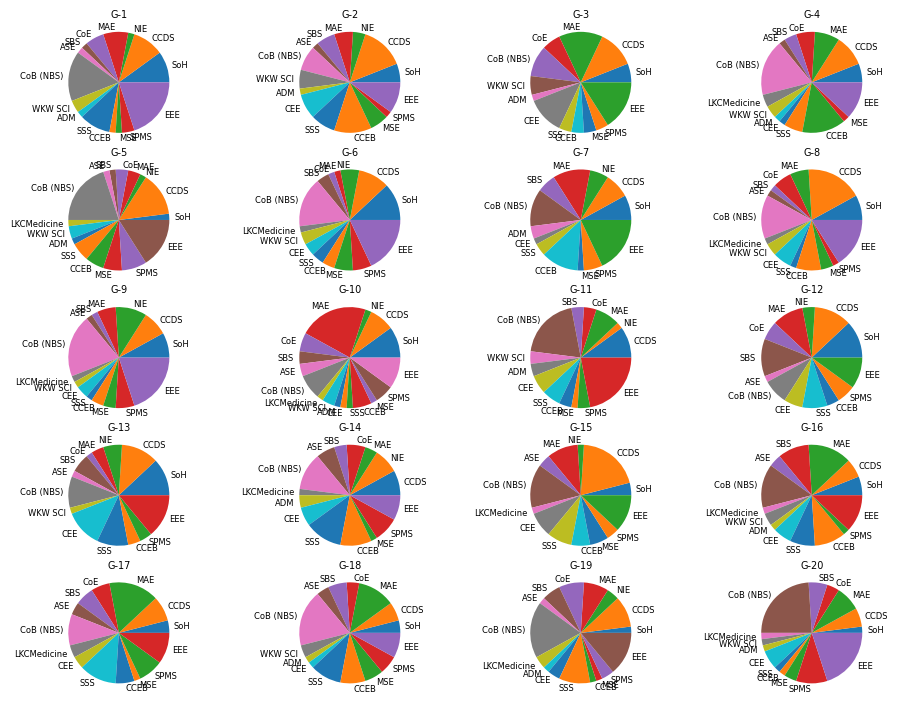

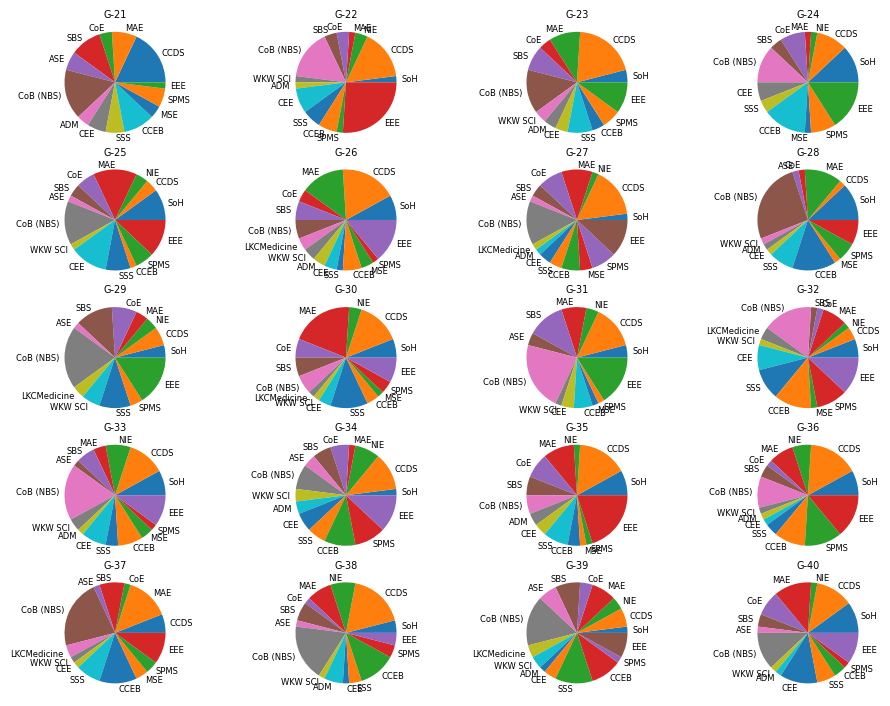

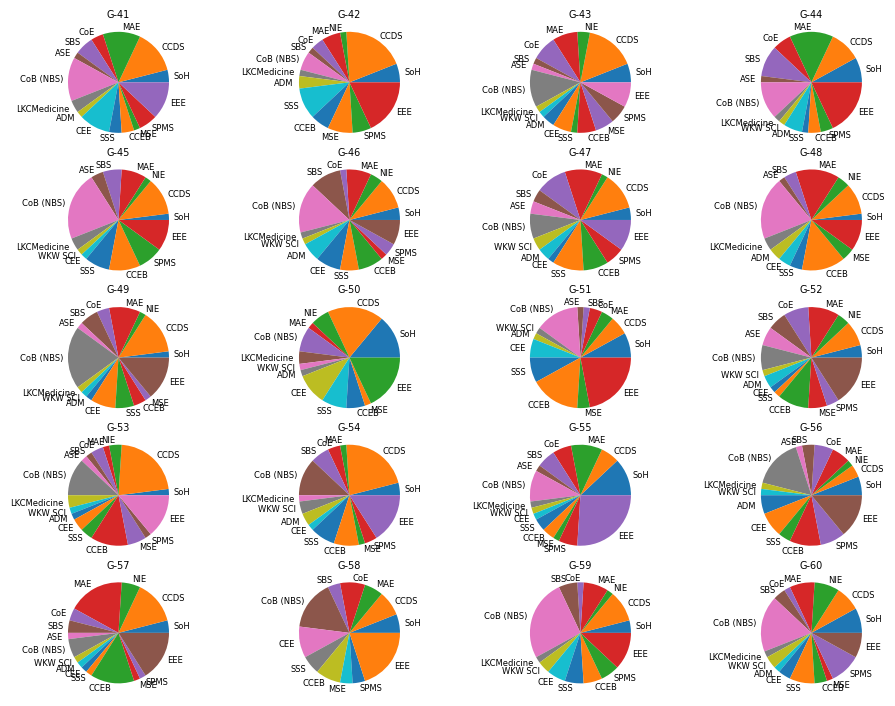

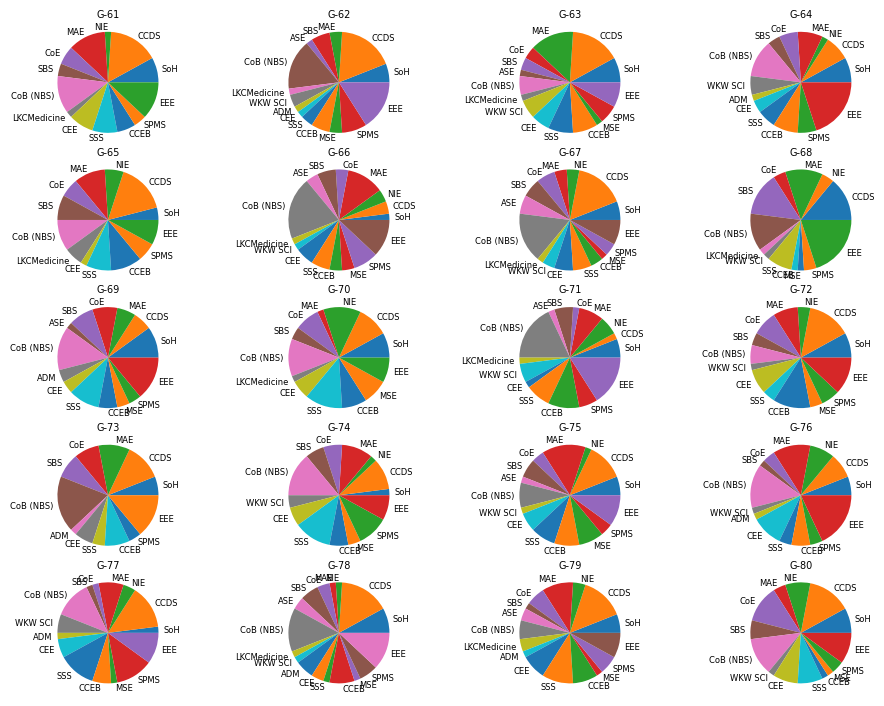

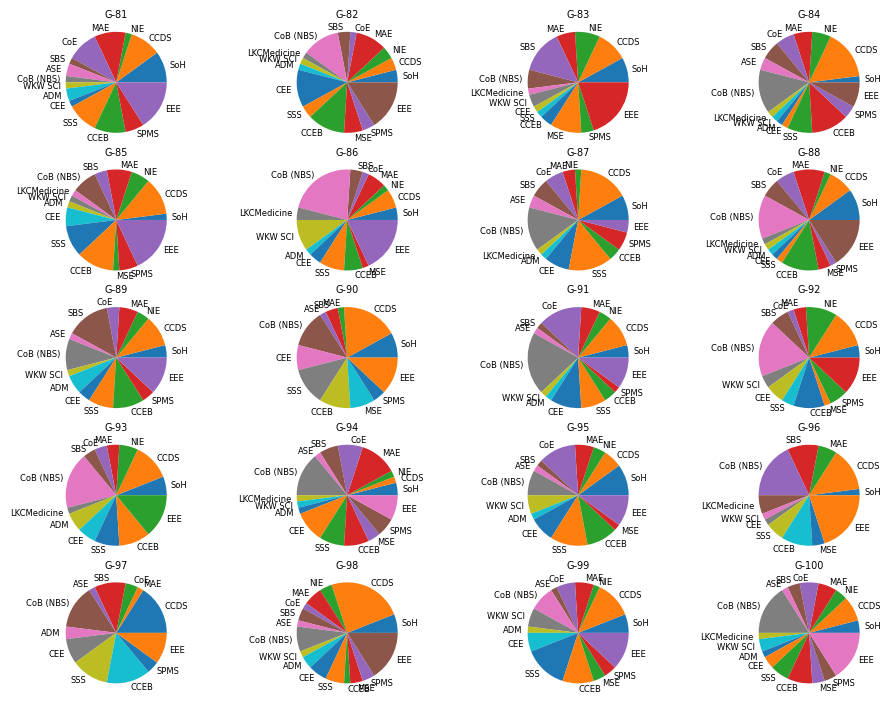

KeyboardInterrupt: 

In [73]:
plot_pie_chart(json_summarised_data)

Above, we have summarised the spread of data per tutorial groups and thus from here, we are able to see what algorithm would be the best. From our data analysis, we have decided that a snake draft algorithm would work best

***
***

## <u><b>ALGORITHM IMPLEMENTATION</b></u>

<h5 style="text-decoration:underline; line-height:1; margin: 0; padding: 0; font-weight:bold;">Snake Draft Algorithm</h5>
<p>Define a function called <b>snake_draft</b> that distributes students into teams using a snake draft pattern, where the selection order reverses each round to ensure fairness.</p>
<b style="line-height:.5; margin:0; padding:0;"><u>Pseudocode:</u></b>
<p style="line-height:1.5; margin:0; padding:0;">Function Name: snake_draft</p>
<p style="line-height:2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Parameters:</p>
<ul>
    <li><b>students_sorted</b> — List of students or dictionary of tutorial groups with student lists</li>
    <li><b>num_teams</b> — Number of teams to create (default: 10)</li>
</ul>
<p style="line-height:1.2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Local Variables:</p>
<ul>
    <li><b>teams</b> (list[list]) — List of team lists, each initially empty</li>
    <li><b>current_team_index</b> (int) — Index of current team being assigned</li>
    <li><b>direction</b> (int) — Draft direction (1 for forward, -1 for reverse)</li>
</ul>
<p style="line-height:1.2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Helper Function: _draft</p>
<ol>
    <li>Initialize:
        <ul>
            <li>Create empty teams list with num_teams empty sublists</li>
            <li>Set current_team_index = 0</li>
            <li>Set direction = 1 (forward)</li>
        </ul>
    </li>
    <li>For each student in students_sorted:
        <ul>
            <li>Add student to team at current_team_index</li>
            <li>Update current_team_index by adding direction</li>
            <li>If current_team_index reaches num_teams:
                <ul>
                    <li>Reverse direction (-1)</li>
                    <li>Set current_team_index to last team</li>
                </ul>
            </li>
            <li>If current_team_index becomes -1:
                <ul>
                    <li>Reverse direction (1)</li>
                    <li>Set current_team_index to first team</li>
                </ul>
            </li>
        </ul>
    </li>
    <li>Return completed teams list</li>
</ol>

<p style="line-height:1.2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Main Function Steps:</p>
<ol>
    <li>Check if input is dictionary (tutorial groups):
        <ul>
            <li>If true: Apply _draft to each tutorial group's students</li>
            <li>If false: Apply _draft directly to student list</li>
        </ul>
    </li>
    <li>Return either:
        <ul>
            <li>Dictionary mapping tutorial groups to their drafted teams</li>
            <li>OR single list of drafted teams</li>
        </ul>
    </li>
</ol>

<p style="line-height:1.2; margin:0; padding:0;">Example with 4 teams:</p>
<pre style="background-color:black;padding:10px;border-radius:5px;">
Input: students = [A, B, C, D, E, F, G, H]  # sorted by CGPA
num_teams = 4

Draft Order:
Round 1: A → B → C → D  (forward)
Round 2: H ← G ← F ← E  (reverse)

Final Teams:
Team 1: [A, H]
Team 2: [B, G]
Team 3: [C, F]
Team 4: [D, E]
</pre>

In [ ]:
def snake_draft(students_sorted,num_teams=10):#this function creates a WIP grouping for an individual tg based solely on gpa in a snake draft format
    def _draft(students_sorted, num_teams=10): 
        teams = [[] for tm in range(num_teams)] # generates an empty list for each team
    
        current_team_index = 0
        direction = 1

        for student in students_sorted:
            teams[current_team_index].append(student) #adds the student at current index to the current group(ungrouped student with the lowest index-highest gpa)
            current_team_index += direction

            if current_team_index == num_teams: #block to reverse direction, creating the snake draft
                direction = -1
                current_team_index = num_teams - 1
            elif current_team_index == -1:
                direction = 1
                current_team_index = 0
            
        return teams
    
    if isinstance(students_sorted,dict):
        return {tg: _draft(students ,num_teams) for tg,students in students_sorted.items()}
    else:   
        return _draft(students_sorted, num_teams)

<h5 style="text-decoration:underline; line-height:1; margin: 0; padding: 0; font-weight:bold;">Team Diversity Scoring</h5>
<p>Define a function called <b>diversity_score</b> that calculates a penalty score for teams based on gender and school distribution. Lower scores indicate better diversity.</p>
<b style="line-height:.5; margin:0; padding:0;"><u>Pseudocode:</u></b>
<p style="line-height:1.5; margin:0; padding:0;">Function Name: diversity_score</p>
<p style="line-height:2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Parameters:</p>
<ul>
    <li><b>team</b> — List of student dictionaries, each containing 'Gender' and 'School' keys</li>
</ul>
<p style="line-height:1.2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Local Variables:</p>
<ul>
    <li><b>score</b> (int) — Accumulated penalty score (0 is best)</li>
    <li><b>gender_counts</b> (dict) — Maps gender → count of students</li>
    <li><b>school_counts</b> (dict) — Maps school → count of students</li>
    <li><b>count</b> (int) — Temporary variable for checking group sizes</li>
</ul>
<p style="line-height:1.2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Steps:</p>
<ol>
    <li>Initialize:
        <ul>
            <li>Set score = 0</li>
            <li>Create empty dictionaries for gender_counts and school_counts</li>
        </ul>
    </li>
    <li>Count Demographics:
        <ul>
            <li>For each student in team:
                <ul>
                    <li>Increment count for student's gender using .get() with default 0</li>
                    <li>Increment count for student's school using .get() with default 0</li>
                </ul>
            </li>
        </ul>
    </li>
    <li>Calculate Gender Penalties:
        <ul>
            <li>For each count in gender_counts.values():
                <ul>
                    <li>If count ≥ 3:
                        <ul>
                            <li>Add (count - 2) × 10 to score</li>
                            <li>Example: 4 students of same gender = (4-2) × 10 = 20 penalty points</li>
                        </ul>
                    </li>
                </ul>
            </li>
        </ul>
    </li>
    <li>Calculate School Penalties:
        <ul>
            <li>For each count in school_counts.values():
                <ul>
                    <li>If count ≥ 2:
                        <ul>
                            <li>Add (count - 2) × 10 to score</li>
                            <li>Example: 3 students from same school = (3-2) × 10 = 10 penalty points</li>
                        </ul>
                    </li>
                </ul>
            </li>
        </ul>
    </li>
    <li>Return final score</li>
</ol>
<p style="line-height:1.2; margin:0; padding:0;">Example Calculation:</p>
<pre style="background-color:black;padding:10px;border-radius:5px;">
Team = [
    {'Gender': 'Male', 'School': 'SCSE'},
    {'Gender': 'Male', 'School': 'SCSE'},
    {'Gender': 'Male', 'School': 'NBS'},
    {'Gender': 'Female', 'School': 'ADM'}
]

Gender Counts: {'Male': 3, 'Female': 1}
Gender Penalty: (3-2) × 10 = 10 points

School Counts: {'SCSE': 2, 'NBS': 1, 'ADM': 1}
School Penalty: (2-2) × 10 = 0 points

Total Score: 10 points (indicates suboptimal gender distribution)
</pre>

In [ ]:
def diversity_score(team): #grades how diverse each group is(lower better)
    score = 0
    gender_counts = {}
    school_counts = {}

    for student in team:
        gender_counts[student['Gender']] = gender_counts.get(student['Gender'], 0) + 1
        school_counts[student['School']] = school_counts.get(student['School'], 0) + 1

    for count in gender_counts.values():
        if count >= 3:
            score += (count - 2) * 10 #every 3rd person onwards of the same gender will add 10 to the diversity score

    for count in school_counts.values():
        if count >= 2:
            score += (count - 2) * 10 #every 2nd person onwards of the same school will add 10 to the diversity score

    return score


<h5 style="text-decoration:underline; line-height:1; margin: 0; padding: 0; font-weight:bold;">Total CGPA Variance</h5>
<p>Define a function called <b>total_cgpa_variance</b> that calculates the statistical variance of team CGPA averages to measure how evenly academic performance is distributed across teams.</p>
<b style="line-height:.5; margin:0; padding:0;"><u>Pseudocode:</u></b>
<p style="line-height:1.5; margin:0; padding:0;">Function Name: total_cgpa_variance</p>
<p style="line-height:2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Parameters:</p>
<ul>
    <li><b>teams</b> — List of team lists, where each team contains student dictionaries with 'CGPA' key</li>
</ul>
<p style="line-height:1.2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Local Variables:</p>
<ul>
    <li><b>team_averages</b> (list[float]) — List of average CGPA for each team</li>
    <li><b>overall_average</b> (float) — Mean of all team CGPA averages</li>
    <li><b>variance</b> (float) — Calculated variance between team averages</li>
</ul>
<p style="line-height:1.2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Steps:</p>
<ol>
    <li>Input Validation:
        <ul>
            <li>If teams is empty or contains any empty teams:
                <ul>
                    <li>Return 0 (no variance for invalid input)</li>
                </ul>
            </li>
        </ul>
    </li>
    <li>Calculate Team Averages:
        <ul>
            <li>For each team in teams:
                <ul>
                    <li>Sum all student CGPAs in team</li>
                    <li>Divide by number of students in team</li>
                    <li>Store in team_averages list</li>
                </ul>
            </li>
        </ul>
    </li>
    <li>Calculate Overall Average:
        <ul>
            <li>Sum all team averages</li>
            <li>Divide by number of teams</li>
            <li>Store in overall_average</li>
        </ul>
    </li>
    <li>Calculate Variance:
        <ul>
            <li>For each team_avg in team_averages:
                <ul>
                    <li>Subtract overall_average from team_avg</li>
                    <li>Square the difference</li>
                    <li>Add to running sum</li>
                </ul>
            </li>
            <li>Divide sum by number of teams</li>
        </ul>
    </li>
    <li>Return variance</li>
</ol>
<p style="line-height:1.2; margin:0; padding:0;">Example Calculation:</p>
<pre style="background-color:black;padding:10px;border-radius:5px;">
Teams = [
    [{'CGPA': 4.0}, {'CGPA': 3.0}],  # Team 1
    [{'CGPA': 3.6}, {'CGPA': 3.4}],  # Team 2
    [{'CGPA': 3.2}, {'CGPA': 3.8}]   # Team 3
]

Team Averages:
- Team 1: (4.0 + 3.0) ÷ 2 = 3.5
- Team 2: (3.6 + 3.4) ÷ 2 = 3.5
- Team 3: (3.2 + 3.8) ÷ 2 = 3.5

Overall Average = (3.5 + 3.5 + 3.5) ÷ 3 = 3.5

Variance = ((3.5 - 3.5)² + (3.5 - 3.5)² + (3.5 - 3.5)²) ÷ 3 = 0.0

Perfect distribution: All teams have same average CGPA!
</pre>

In [ ]:
def total_cgpa_variance(teams):
    if not teams or not all(teams):
        return 0
    
    team_averages = [sum(s['CGPA'] for s in team) / len(team) for team in teams] #calculate the average cgpa of each group
    overall_average = sum(team_averages) / len(team_averages) #calculate the average cgpa of the tg
    
    variance = sum((avg - overall_average) ** 2 for avg in team_averages) / len(team_averages) #calculates the variance of the average tg (standard s^2 variance)
    return variance

<h5 style="text-decoration:underline; line-height:1; margin: 0; padding: 0; font-weight:bold;">Team Optimizer Algorithm</h5>
<p>Define a function called <b>optimize_teams_with_gpa_check</b> that iteratively improves team compositions by swapping students between teams to optimize both diversity and academic balance.</p>
<b style="line-height:.5; margin:0; padding:0;"><u>Pseudocode:</u></b>
<p style="line-height:1.5; margin:0; padding:0;">Function Name: optimize_teams_with_gpa_check</p>
<p style="line-height:2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Parameters:</p>
<ul>
    <li><b>teams_in_tg</b> — List of team lists, where each team contains student dictionaries</li>
</ul>
<p style="line-height:1.2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Constants:</p>
<ul>
    <li><b>DIVERSITY_WEIGHT</b> (float) — Weight for diversity score (0.70)</li>
    <li><b>CGPA_WEIGHT</b> (float) — Weight for CGPA variance (0.30)</li>
    <li><b>MAX_ITERATIONS(k)</b> (int) — Maximum optimization attempts (50)</li>
</ul>
<p style="line-height:1.2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Local Variables:</p>
<ul>
    <li><b>current_diversity_score</b> (float) — Sum of diversity scores across all teams</li>
    <li><b>current_cgpa_variance</b> (float) — Current CGPA variance across teams</li>
    <li><b>best_improvement_score</b> (float) — Best improvement found in current iteration</li>
    <li><b>best_swap_details</b> (tuple) — Storage for best swap parameters (i, j, s1_idx, s2_idx)</li>
</ul>
<p style="line-height:1.2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Steps:</p>
<ol>
    <li>Initialize Optimization:
        <ul>
            <li>Set optimization weights for diversity (0.70) and CGPA (0.30)</li>
            <li>Begin iteration loop (max 50 iterations)</li>
        </ul>
    </li>
    <li>Calculate Current Metrics:
        <ul>
            <li>Sum diversity scores for all teams</li>
            <li>Calculate total CGPA variance</li>
        </ul>
    </li>
    <li>Check for Perfect Solution:
        <ul>
            <li>If diversity_score = 0 and cgpa_variance < 0.001:
                <ul>
                    <li>Return current teams (already optimal)</li>
                </ul>
            </li>
        </ul>
    </li>
    <li>Try All Possible Swaps:
        <ul>
            <li>For each pair of teams (i, j):
                <ul>
                    <li>For each student in team i (s1_idx):
                        <ul>
                            <li>For each student in team j (s2_idx):
                                <ul>
                                    <li>Simulate swap between teams</li>
                                    <li>Calculate new scores after swap</li>
                                    <li>Calculate weighted improvement:
                                        <ul>
                                            <li>diversity_improvement × 0.70</li>
                                            <li>cgpa_improvement × 0.30</li>
                                        </ul>
                                    </li>
                                    <li>If best improvement so far:
                                        <ul>
                                            <li>Store swap details</li>
                                        </ul>
                                    </li>
                                    <li>Reverse swap to try next combination</li>
                                </ul>
                            </li>
                        </ul>
                    </li>
                </ul>
            </li>
        </ul>
    </li>
    <li>Apply Best Swap:
        <ul>
            <li>If improvement found:
                <ul>
                    <li>Perform the stored best swap</li>
                    <li>Continue to next iteration</li>
                </ul>
            </li>
            <li>Else:
                <ul>
                    <li>Break loop (no more improvements possible)</li>
                </ul>
            </li>
        </ul>
    </li>
    <li>Return optimized teams</li>
</ol>

<p style="line-height:1.2; margin:0; padding:0;">Example Optimization:</p>
<pre style="background-color:black;padding:10px;border-radius:5px;">
Initial State:
Team 1: [Male SCSE 3.8, Male SCSE 3.6]    # Bad diversity
Team 2: [Female NBS 3.2, Female ADM 3.4]   # Bad diversity

Iteration 1:
Best Swap Found: Team1[1] ↔ Team2[0]
New State:
Team 1: [Male SCSE 3.8, Female NBS 3.2]    # Better diversity
Team 2: [Male SCSE 3.6, Female ADM 3.4]    # Better diversity

Improvements:
- Diversity: Reduced gender clustering
- CGPA: Maintained reasonable academic spread
- Total Score: Significantly improved

Algorithm continues until no better swaps found
</pre>

In [ ]:
def optimize_teams(teams_in_tg, diversity_weight=0.70, cgpa_weight=0.30):
    DIVERSITY_WEIGHT = diversity_weight
    CGPA_WEIGHT = cgpa_weight #set weights

    for k in range(50): #number of tests to run
        current_diversity_score = sum(diversity_score(t) for t in teams_in_tg)
        current_cgpa_variance = total_cgpa_variance(teams_in_tg) #calculates initial score and variance of current teams

        if current_diversity_score == 0 and current_cgpa_variance < 0.001: #if teams are new perfect, dont change
            break 

        best_improvement_score = 0
        best_swap_details = None #instansiation of vars

        for i in range(len(teams_in_tg)):
            for j in range(i + 1, len(teams_in_tg)): #every combination of teams

                for s1_idx in range(len(teams_in_tg[i])):
                    for s2_idx in range(len(teams_in_tg[j])): 
                        team1 = teams_in_tg[i]
                        team2 = teams_in_tg[j]#every combination of students within the chosen teams

                        team1[s1_idx], team2[s2_idx] = team2[s2_idx], team1[s1_idx]#simulate the swap

                        new_diversity_score = sum(diversity_score(t) for t in teams_in_tg)
                        new_cgpa_variance = total_cgpa_variance(teams_in_tg) #new scores for the swap
                        
                        diversity_improvement = current_diversity_score - new_diversity_score #change in diversity score
                        cgpa_improvement = current_cgpa_variance - new_cgpa_variance #change in cgpa variance

                        total_improvement = (diversity_improvement * DIVERSITY_WEIGHT) + (cgpa_improvement * CGPA_WEIGHT)

                        if total_improvement > best_improvement_score:
                            best_improvement_score = total_improvement
                            best_swap_details = (i, j, s1_idx, s2_idx)#if this is the best swap, store it 

                        team1[s1_idx], team2[s2_idx] = team2[s2_idx], team1[s1_idx] #swap back for now to check all other possibilities
        
        if best_swap_details:
            i, j, s1, s2 = best_swap_details
            teams_in_tg[i][s1], teams_in_tg[j][s2] = teams_in_tg[j][s2], teams_in_tg[i][s1]#sets the best swap after checking all
        else:
            break#if there are no good swaps, break the loop to save computational power
            
    return teams_in_tg

<h5 style="text-decoration:underline; line-height:1; margin: 0; padding: 0; font-weight:bold;">Create Teams by Size</h5>
<p>Define a function called <b>create_teams_by_size</b> that creates teams with a specified target size, handling both individual lists and tutorial group dictionaries.</p>

<b style="line-height:.5; margin:0; padding:0;"><u>Pseudocode:</u></b>
<p style="line-height:1.5; margin:0; padding:0;">Function Name: create_teams_by_size</p>

<p style="line-height:2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Parameters:</p>
<ul>
    <li><b>students_sorted</b> — List of students or dictionary of tutorial groups</li>
    <li><b>team_size</b> — Target number of students per team</li>
</ul>

<p style="line-height:1.2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Local Variables:</p>
<ul>
    <li><b>n</b> (int) — Number of students in current list/group</li>
    <li><b>num_teams</b> (int) — Number of teams needed for desired team size</li>
</ul>

<p style="line-height:1.2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Steps:</p>
<ol>
    <li>Dictionary Case:
        <ul>
            <li>If students_sorted is a dictionary:
                <ul>
                    <li>Create new dictionary with same tutorial group keys</li>
                    <li>For each tutorial group (tg) and its students:
                        <ul>
                            <li>Recursively call create_teams_by_size on student list</li>
                            <li>Store result in new dictionary under same tg key</li>
                        </ul>
                    </li>
                    <li>Return dictionary of team assignments</li>
                </ul>
            </li>
        </ul>
    </li>
    <li>List Case (Base Case):
        <ul>
            <li>Get number of students (n)</li>
            <li>If n is 0:
                <ul>
                    <li>Return empty list</li>
                </ul>
            </li>
            <li>Calculate required teams:
                <ul>
                    <li>num_teams = ceiling(n ÷ team_size)</li>
                </ul>
            </li>
            <li>Use snake_draft to create balanced teams:
                <ul>
                    <li>Pass student list and num_teams</li>
                    <li>Return resulting team assignments</li>
                </ul>
            </li>
        </ul>
    </li>
</ol>



In [ ]:
def create_teams_by_size(students_sorted, team_size):
    if isinstance(students_sorted, dict):
        return {tg: create_teams_by_size(students, team_size) for tg, students in students_sorted.items()}
    n = len(students_sorted)
    if n == 0:
        return []
    num_teams = math.ceil(n / team_size)#returns number of teams with team size.
    return snake_draft(students_sorted, num_teams=num_teams) #reuse snake


<h5 style="text-decoration:underline; line-height:1; margin: 0; padding: 0; font-weight:bold;">Data Compilation</h5>
<p>Define a function called <b>data_compilation</b> that flattens the hierarchical team structure and assigns team numbers to prepare data for CSV export.</p>
<b style="line-height:.5; margin:0; padding:0;"><u>Pseudocode:</u></b>
<p style="line-height:1.5; margin:0; padding:0;">Function Name: data_compilation</p>
<p style="line-height:2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Parameters:</p>
<ul>
    <li><b>all_optimized_tgs</b> — Dictionary mapping tutorial groups to their team lists</li>
</ul>
<p style="line-height:1.2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Local Variables:</p>
<ul>
    <li><b>final_student_list</b> (list) — Flattened list of all students with team assignments</li>
    <li><b>sorted_tg_names</b> (list) — Sorted list of tutorial group names</li>
    <li><b>list_of_teams</b> (list) — Teams within current tutorial group</li>
    <li><b>team_number</b> (int) — Current team's assigned number (1-based)</li>
</ul>
<p style="line-height:1.2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Steps:</p>
<ol>
    <li>Initialize:
        <ul>
            <li>Create empty final_student_list</li>
            <li>Sort tutorial group names alphabetically</li>
        </ul>
    </li>
    <li>Process Tutorial Groups:
        <ul>
            <li>For each tutorial group name in sorted order:
                <ul>
                    <li>Get list of teams for current tutorial group</li>
                    <li>For each team (using enumeration for index):
                        <ul>
                            <li>Calculate team_number as index + 1</li>
                            <li>For each student in team:
                                <ul>
                                    <li>Add "Team Assigned" field to student dictionary</li>
                                    <li>Append modified student to final_student_list</li>
                                </ul>
                            </li>
                        </ul>
                    </li>
                </ul>
            </li>
        </ul>
    </li>
    <li>Return final_student_list</li>
</ol>
<p style="line-height:1.2; margin:0; padding:0;">Example Processing:</p>
<pre style="background-color:black;padding:10px;border-radius:5px;">
Input:
{
    "G-2": [
        [{"Name": "Alice", "CGPA": 4.0}, {"Name": "Bob", "CGPA": 3.8}],  # Team 1
        [{"Name": "Carol", "CGPA": 3.9}, {"Name": "Dave", "CGPA": 3.7}]   # Team 2
    ],
    "G-1": [
        [{"Name": "Eve", "CGPA": 4.0}, {"Name": "Frank", "CGPA": 3.8}],   # Team 1
        [{"Name": "Grace", "CGPA": 3.9}, {"Name": "Henry", "CGPA": 3.7}]  # Team 2
    ]
}

Processing:
1. Sort groups: ["G-1", "G-2"]
2. Process G-1:
   - Team 1: Add team_number=1 to Eve, Frank
   - Team 2: Add team_number=2 to Grace, Henry
3. Process G-2:
   - Team 1: Add team_number=1 to Alice, Bob
   - Team 2: Add team_number=2 to Carol, Dave

Output (final_student_list):
[
    {"Name": "Eve", "CGPA": 4.0, "Team Assigned": 1},
    {"Name": "Frank", "CGPA": 3.8, "Team Assigned": 1},
    {"Name": "Grace", "CGPA": 3.9, "Team Assigned": 2},
    {"Name": "Henry", "CGPA": 3.7, "Team Assigned": 2},
    {"Name": "Alice", "CGPA": 4.0, "Team Assigned": 1},
    {"Name": "Bob", "CGPA": 3.8, "Team Assigned": 1},
    {"Name": "Carol", "CGPA": 3.9, "Team Assigned": 2},
    {"Name": "Dave", "CGPA": 3.7, "Team Assigned": 2}
]
</pre>

In [ ]:
def data_compilation(all_optimized_tgs): #prepares data for csv writing and assigns team numbers
    final_student_list = []
    sorted_tg_names = sorted(all_optimized_tgs.keys())

    for tg_name in sorted_tg_names:
        list_of_teams = all_optimized_tgs[tg_name]#grabs the list of teams in a tg
        for team_index, team in enumerate(list_of_teams):
            team_number = team_index + 1 # adds a group number 
            for student in team:
                student["Tutorial Group"] = tg_name
                student["Team Assigned"] = team_number #assigns the group number to the student
                final_student_list.append(student) #adds the student, with all their data into the list as a list
    return final_student_list

<h5 style="text-decoration:underline; line-height:1; margin: 0; padding: 0; font-weight:bold;">Write Data to CSV File</h5>
<p>Define a function called <b>write_output_csv</b> that writes the final team assignments to a CSV file in a structured format.</p>
<b style="line-height:.5; margin:0; padding:0;"><u>Pseudocode:</u></b>
<p style="line-height:1.5; margin:0; padding:0;">Function Name: write_output_csv</p>
<p style="line-height:2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Parameters:</p>
<ul>
    <li><b>final_student_list</b> — List of student dictionaries with team assignments</li>
    <li><b>output_path</b> — Path for output CSV file (default: "final_teams.csv")</li>
</ul>
<p style="line-height:1.2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Local Variables:</p>
<ul>
    <li><b>headers</b> (list[str]) — Column names for CSV file</li>
    <li><b>output_data</b> (list[dict]) — Processed student data with selected fields</li>
    <li><b>writer</b> (csv.DictWriter) — CSV writer object configured with headers</li>
</ul>
<p style="line-height:1.2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Steps:</p>
<ol>
    <li>Input Validation:
        <ul>
            <li>If final_student_list is empty:
                <ul>
                    <li>Print error message</li>
                    <li>Return without writing file</li>
                </ul>
            </li>
        </ul>
    </li>
    <li>Define CSV Structure:
        <ul>
            <li>Create headers list with required columns:
                <ul>
                    <li>Tutorial Group</li>
                    <li>Team Assigned</li>
                    <li>Student ID</li>
                    <li>Name</li>
                    <li>School</li>
                    <li>Gender</li>
                    <li>CGPA</li>
                </ul>
            </li>
        </ul>
    </li>
    <li>Process Student Data:
        <ul>
            <li>For each student in final_student_list:
                <ul>
                    <li>Create new dictionary with only header fields</li>
                    <li>Use .get() to safely extract values</li>
                    <li>Add to output_data list</li>
                </ul>
            </li>
        </ul>
    </li>
    <li>Write CSV File:
        <ul>
            <li>Open output_path in write mode with newline=''</li>
            <li>Create DictWriter with defined headers</li>
            <li>Write header row</li>
            <li>Write all student data rows</li>
            <li>File automatically closed by context manager</li>
        </ul>
    </li>
    <li>Confirm Success:
        <ul>
            <li>Print success message with output file path</li>
        </ul>
    </li>
</ol>
<p style="line-height:1.2; margin:0; padding:0;">Example Output Format:</p>
<pre style="background-color:black;padding:10px;border-radius:5px;">
Input:
final_student_list = [
    {
        "Tutorial Group": "G-1",
        "Team Assigned": 1,
        "Student ID": "U2121234A",
        "Name": "Alice",
        "School": "SCSE",
        "Gender": "Female",
        "CGPA": 4.0,
        "other_field": "ignored"
    },
    ...
]

Output CSV (final_teams.csv):
Tutorial Group,Team Assigned,Student ID,Name,School,Gender,CGPA
G-1,1,U2121234A,Alice,SCSE,Female,4.0
G-1,2,U2121235B,Bob,NBS,Male,3.8
...

Note: Only specified headers are included in output,
      additional fields in student dictionaries are ignored
</pre>

In [ ]:
def write_output_csv(final_student_list, output_path):
    if not final_student_list:
        print("No data available to write.") #incase of faulty inputs
        return
    
    headers = ["Tutorial Group", "Student ID", "Name", "School", "Gender", "CGPA", "Team Assigned"] #initialise the headers
    
    output_data = [{header: student.get(header) for header in headers} for student in final_student_list]

    with open(output_path, mode='w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=headers)
        writer.writeheader()
        writer.writerows(output_data) #write file
    print(f"Successfully created GPA-optimized allocation file: {output_path}")


<h5 style="text-decoration:underline; line-height:1; margin: 0; padding: 0; font-weight:bold;">Main Algorithm Execution with Interactive UI</h5>
<p>Define the main execution function <b>_run_all</b> and interactive UI components that allow users to configure and run the team allocation algorithm with custom parameters.</p>
<b style="line-height:.5; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;"><u>Pseudocode:</u></b>
<h6 style="margin: 0; margin-bottom:5px; font-size:20px;">Function _run_all()</h6>
<p style="line-height:1.5; margin:0; padding:0;">Function Name: _run_all</p>
<p style="line-height:2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Parameters:</p>
<ul>
    <li><b>team_size</b> (int) — Target number of students per team</li>
    <li><b>diversity_wt</b> (float) — Weight for diversity optimization</li>
    <li><b>cgpa_wt</b> (float) — Weight for CGPA balance optimization</li>
</ul>
<p style="line-height:1.2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Local Variables:</p>
<ul>
    <li><b>total</b> (float) — Sum of input weights</li>
    <li><b>json_file</b> (str) — Path to JSON file containing student data</li>
    <li><b>tutorial_groups</b> (dict) — Dictionary of tutorial groups and students</li>
    <li><b>all_optimized_teams</b> (dict) — Stores final optimized teams for all groups</li>
    <li><b>final_list</b> (list) — Flattened list of all students with assignments</li>
</ul>
<p style="line-height:1.2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Steps:</p>
<ol>
    <li>Normalize Weights:
        <ul>
            <li>Calculate total = diversity_wt + cgpa_wt</li>
            <li>If total == 0 (both weights are zero):
                <ul>
                    <li>Set diversity_wt = 0.7, cgpa_wt = 0.3 (defaults)</li>
                </ul>
            </li>
            <li>Else:
                <ul>
                    <li>Normalize: diversity_wt = diversity_wt / total</li>
                    <li>Normalize: cgpa_wt = cgpa_wt / total</li>
                </ul>
            </li>
        </ul>
    </li>
    <li>Load Student Data:
        <ul>
            <li>Create/refresh JSON from CSV: json_file = tut_grp_json(path)</li>
            <li>Load JSON into dictionary: tutorial_groups = load_json_to_dict(json_file)</li>
        </ul>
    </li>
    <li>Validate Data:
        <ul>
            <li>If tutorial_groups is empty:
                <ul>
                    <li>Print "No data found after loading JSON."</li>
                    <li>Return early</li>
                </ul>
            </li>
        </ul>
    </li>
    <li>Process All Tutorial Groups:
        <ul>
            <li>Initialize all_optimized_teams as empty dictionary</li>
            <li>For each tg_name, students in tutorial_groups:
                <ul>
                    <li>Print progress message with tg_name and team_size</li>
                    <li>Create initial_teams using create_teams_by_size(students, team_size)</li>
                    <li>Optimize teams with optimize_teams(initial_teams, diversity_wt, cgpa_wt)</li>
                    <li>Store optimized_teams in all_optimized_teams[tg_name]</li>
                </ul>
            </li>
        </ul>
    </li>
    <li>Generate Output:
        <ul>
            <li>Compile final_list = data_compilation(all_optimized_teams)</li>
            <li>Write to CSV: write_output_csv(final_list, "final_teams.csv")</li>
            <li>Print "Done. Output written to final_teams.csv."</li>
        </ul>
    </li>
</ol>
<h6 style="margin-top:15px; margin-bottom:5px; font-size:20px;">Interactive UI Components</h6>
<p style="line-height:1.2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Widget Definitions:</p>
<ul>
    <li><b>team_size_slider</b> — IntSlider (value=5, min=4, max=10, step=1)</li>
    <li><b>diversity_slider</b> — FloatSlider (value=0.7, min=0.0, max=1.0, step=0.01)</li>
    <li><b>cgpa_slider</b> — FloatSlider (value=0.3, min=0.0, max=1.0, step=0.01)</li>
    <li><b>run_button</b> — Button (description='Run')</li>
    <li><b>output_area</b> — Output widget for displaying results</li>
</ul>
<p style="line-height:1.2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Event Handler Function:</p>
<ol>
    <li>Function Name: on_run_clicked
        <ul>
            <li>Parameter: b (button event object)</li>
            <li>Steps:
                <ul>
                    <li>Use output_area context</li>
                    <li>Clear previous output (wait=True)</li>
                    <li>Call _run_all with slider values:
                        <ul>
                            <li>team_size_slider.value</li>
                            <li>diversity_slider.value</li>
                            <li>cgpa_slider.value</li>
                        </ul>
                    </li>
                </ul>
            </li>
        </ul>
    </li>
</ol>
<p style="line-height:1.2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">UI Assembly:</p>
<ol>
    <li>Attach on_run_clicked to run_button click event</li>
    <li>Display HBox with horizontal layout:
        <ul>
            <li>team_size_slider</li>
            <li>diversity_slider</li>
            <li>cgpa_slider</li>
            <li>run_button</li>
        </ul>
    </li>
    <li>Display output_area below controls</li>
</ol>

In [ ]:
def _run_all(team_size, diversity_wt, cgpa_wt):
    # normalize weights so they sum to 1 (if both zero, fallback to defaults)
    total = diversity_wt + cgpa_wt
    if total == 0:
        diversity_wt, cgpa_wt = 0.7, 0.3
    else:
        diversity_wt, cgpa_wt = diversity_wt / total, cgpa_wt / total

    # Create (or refresh) the sorted JSON from the CSV and load it
    json_file = tut_grp_json(path)#records.csv
    tutorial_groups = load_json_to_dict(json_file)

    if not tutorial_groups:
        print("No data found after loading JSON.")
        return

    all_optimized_teams = {}

    for tg_name, students in tutorial_groups.items():
        print(f"Processing Tutorial Group: {tg_name} (team size={team_size})...")
        initial_teams = create_teams_by_size(students, team_size)
        optimized_teams = optimize_teams(initial_teams, diversity_weight=diversity_wt, cgpa_weight=cgpa_wt)
        all_optimized_teams[tg_name] = optimized_teams

    final_list = data_compilation(all_optimized_teams)
    write_output_csv(final_list, output_path="FCSC_Team4_CaseyBodhiyano.csv")
    print("Done. Output written to FCSC_Team4_CaseyBodhiyano.csv.")

team_size_slider = widgets.IntSlider(value=5, min=4, max=10, step=1, description='Team Size')
diversity_slider = widgets.FloatSlider(value=0.7, min=0.0, max=1.0, step=0.01, description='Diversity Wt')
cgpa_slider = widgets.FloatSlider(value=0.3, min=0.0, max=1.0, step=0.01, description='CGPA Wt')
run_button = widgets.Button(description='Run')
output_area = widgets.Output()

def on_run_clicked(b):
    with output_area:
        clear_output(wait=True)
        _run_all(team_size_slider.value, diversity_slider.value, cgpa_slider.value)

run_button.on_click(on_run_clicked)
display(widgets.HBox([team_size_slider, diversity_slider, cgpa_slider, run_button]))
display(output_area)


Output()

***
***

### <u><b>ALGORITHM ANALYSIS</b></u>
There are 4 algorithms that are suggested during our team's discussion, which will be tested on the `normal dataset` and the `extreme datasets`.

All algorithms will be tasked to split the students into teams, where each team consists of `5 students`.

***

#### <b>List of Algorithms</b> (Located in *"assets/algorithms"* folder)

1. "<i><b>snakedraft.py</b></i>"
    - Sort the students in each tutorial groups based on their `cgpa`.
    - Divide the students into each teams by using <b>SNAKE DRAFT</b> method.
    - Calculate each team's `diversity score` and use it to consider swapping `students` between teams if it makes `diversity score` lower.

2. "<i><b>genderpriority.py</b></i>"
    - Split the students in each tutorial groups based on their `gender` .
    - Sort the students in each `gender` based on their `cgpa`.
    - Find the `minority gender` and spread the students evenly into the teams by using <b>SNAKE DRAFT</b> method.
    - Then, The students in `majority gender` are assigned into available teams with consideration to the `school` diversity.

3. "<i><b>outlierfocused.py</b></i>"
    - Calculate `average cgpa` of the tutorial group, in order to create `target average cgpa` of each team.
    - Sort the students in each tutorial groups based on their `cgpa`.
    - Categorize the students into:
        - `Low Outliers`: Bottom 10 students based on their `cgpa`.
        - `High Outliers`: Top 10 students based on their `cgpa`.
        - `Middle`: The rest of the students.
    - Spread the students in `Low Outliers` in a forward direction and the students in `High Outliers` in a backward direction to make the current `average cgpa` of each team as close as possible to `target average cgpa`.
    - Assign the students in `Middle` based on their ability to make potential `average cgpa` of a team to be nearer to `target average cgpa` while `gender` and `school` constraints are satisfied.

4. "<i><b>GPAoptimized.py</b></i>"
    - An improved version of <i><b>snakedraft.py</b></i>, where `cgpa` is now considered during swapping process.
    - Students are now also judged by their ability to make `cgpa variance` to be as close as `0` while `diversity score` are also considered.

5. "<i><b>randomized.py</b></i>"
    - Assign each students randomly into a team.

***

#### <b>Test Cases</b> (Located in *"assets/analysis_plots_final"* folder)
All test cases, except "<i><b>Normal</b></i>" will be a modified version of `records.csv`.

##### <b>Functions for Modifying Dataset</b>

- `modifyCGPA(students, variation)`
    - Initialize `mean`, `sd`, and `outlier_chance` for generating the dataset
    - For each student, assign their cgpa based on the `outlier_chance` to become:
        - "<i>Outliers</i>": `|sd| > 2`
        - "<i>Normal</i>": Generate `cgpa` within `|sd| <= 2`

- `modifyGender(students, variation)`
    - Let `dominant_gender` be the first student's `gender`
    - Initialize `dominant_count` to be `int(number_of_students // 2 * min(1 + random.uniform(0.95, 1.05) * variation, 2))`
    - Assign `dominant_count` numbers of `dominant_gender` to the students' gender
    - Assign the rest of the students' gender to be the other gender

- `modifySchool(students, variation)`
    - Find all distinct schools inside `students` list
    - Let `dominant_school` be the first school inside the distinct `schools_list`
    - Initialize `dominant_count` to be `int(min(random.uniform(0.95, 1.05) * variation * number_of_students, number_of_students))`
    - Assign `dominant_count` numbers of `dominant_school` to the students' school
    - Assign the rest of the students' school by "random" from "`schools_list - [dominant_school]`"

In [ ]:
"""
INPUT: students: list -> The student data
       variation: float -> The variation that is desired
OUTPUT: students: list -> The modified student data

The generated data will be "similar" to a normal distribution.
Maximum (sd) = 2.5 as Maximum variance of a dataset bounded by [0, 5] is 25/4.

In [0, 5] dataset, we categorize the outliers by setting their 2 <= (abs(sd)) <= 2.5.
"""

def modifyCGPA(students, variation): 
    mean = 2.5 # DO NOT CHANGE PLEASE
    sd = 0.1 + 1.9 * variation # max sd = 2
    outlier_chance = 0.1 + 0.9 * variation # max outlier_chance = 1 (This means the dataset will consists of "outliers")

    for student in students:
        #On a dataset with its data bounded by [0, 5], the max sd = 2.5
        if (random.random() < outlier_chance): #Generate outliers by chance
            if (random.random() < 0.5): 
                #Lower outliers
                student["CGPA"] =  round(random.uniform(-2.5, -2) + mean, 2)
            else: 
                #Uppers outliers
                student["CGPA"] = round(random.uniform(2, 2.5) + mean, 2)
        else: 
            #Generate data with standard deviation of the range [-sd, sd]
            student["CGPA"] = round(random.uniform(-sd, sd) + mean, 2) 

    return students

"""
INPUT: students: list -> The student data
       variation: float -> The variation that is desired
OUTPUT: students: list -> The modified student data

We pick (dominant_gender) as the first student's gender.
(dominant_count) is generated from [25, 50].
"""

def modifyGender(students, variation):   
    number_of_students = len(students)

    dominant_gender = students[0]["Gender"]
    dominant_count = int(number_of_students // 2 * min(1 + random.uniform(0.95, 1.05) * variation, 2))

    gender = [] 
    for i in range(0, dominant_count):
        gender.append(dominant_gender) #Generate `dominant_count` of the dominant gender

    other_gender = "Female" if dominant_gender == "Male" else "Male" 
    for i in range(0, number_of_students - dominant_count):
        gender.append(other_gender) #Add the remaining non-dominant gender

    random.shuffle(gender)
    for i in range(0, number_of_students):
        students[i]["Gender"] = gender[i] #Assign the generated genders to the students]

    return students

"""
INPUT: students: list -> The student data
       variation: float -> The variation that is desired
OUTPUT: students: list -> The modified student data

We pick the (dominant_school) as the first student's school.
(dominant_count) range is generated from [1, 50].

However, even though (dominant_school) might not be the dominant one, 
there will always be at least (len(students) / len(schools_list)) number of the "dominant school"
"""

def modifySchool(students, variation): 
    # Identify the unique schools
    schools_list = []
    for student in students:
        if (student["School"] not in schools_list): schools_list.append(student["School"])

    number_of_students = len(students)

    dominant_school = schools_list[0]
    dominant_count = int(min(random.uniform(0.95, 1.05) * variation * number_of_students, number_of_students))
    
    schools = []
    for i in range(0, dominant_count):
        schools.append(dominant_school) #Generate the dominant school 
    schools_list.pop(0)

    for i in range(0, number_of_students - dominant_count):
        schools.append(random.choice(schools_list)) #Add the remaining schools

    random.shuffle(schools)
    for i in range(0, number_of_students):
        students[i]["School"] = schools[i] #Assign the generated schools to the students

    return students

##### <b>Functions for Analysis of Test Cases' Data</b>

- `total_cgpa_variance(students)` has the same functionality as `total_cgpa_variance(teams)`, except we handle per tutorial groups now.
- `gender_score(students)` and `school_score(students)` are functions that is the same as `diversity_score(team)` when combined

- `plotGraph(tutorial_groups, out_path)`
    - Separate each category (`cgpa`, `gender`, `school`) into 3 different lists of data
    - For each tutorial groups:
        - Calculate the "<i>% variance</i>" of each category
    - Plot all categories

In [ ]:
"""
INPUT: students: list -> The student data
OUTPUT: variance: float -> The variance of the data

This function calculates the variance of the students' CGPA based on the formula
                variance = sum(x - mean)^2 / N
where 
    x -> individual cgpa
    mean -> average cgpa
    N -> number of data
"""

def cgpa_variance(students):
    overall_average = sum(s['CGPA'] for s in students) / len(students) #calculate the average cgpa of the students
    
    variance = sum((s['CGPA'] - overall_average) ** 2 for s in students) / len(students) #calculates the variance of the average tg (standard s^2 variance)
    return variance

"""
INPUT: students: list -> The student data
OUTPUT: abs(score): int -> The gender score

This function calculates the gender score which is the difference between the number of males and females.
"""

def gender_score(students): #grades how diverse each group is(lower better)
    score = 0
    for student in students:
        if (student["Gender"] == "Male"): score += 1
        else: score -= 1

    return abs(score)

"""
INPUT: students: list -> The student data
OUTPUT: score: int -> The school score

This function calculates the school score, which is calculated by (the number of each schools - 2) * 10, 
whenever there is a duplicate of the same school (school >= 2)
"""

def school_score(students): #grades how diverse each group is(lower better)
    score = 0
    school_counts = {}

    for student in students:
        school_counts[student['School']] = school_counts.get(student['School'], 0) + 1

    for count in school_counts.values():
        if count >= 2:
            score += (count - 2) * 10 #every 2nd person onwards of the same school will add 10 to the diversity score

    return score

"""
INPUT: tutorial_groups: dict -> The student data separated by their tutorial groups
       out_path: str -> The output filename to draw the graph on

The "variance" percentage for each category is calculated by:
- CGPA: (cgpa) / (max_variance) * 100, where (max_variance) = 25/4 in [0, 5] dataset
- Gender: (gender) / (max_score) * 100, where (max_score) = 50
- School: (school) / (max_score) * 100, where (max_score) = 480
"""

def plotGraph(tutorial_groups, out_path):
    data1, data2, data3 = [], [], []
    for tg, students in tutorial_groups.items():
        cgpa = cgpa_variance(students)
        gender = gender_score(students)
        school = school_score(students)

        data1.append(cgpa / (25 / 4) * 100) # Maximum variance for a [0, 5] dataset = 25/4
        data2.append(gender / 50 * 100) # Maximum score = 50
        data3.append(school / 480 * 100) # Maximum score = 480

    fig, axis = plt.subplots(3)

    #CGPA
    axis[0].plot(data1, color = "red")
    axis[0].set_title("CGPA")
    axis[0].set_yticks([0, 25, 50, 75, 100])
    axis[0].set_ylabel("%")

    #GENDER
    axis[1].plot(data2, ",-g")
    axis[1].set_title("GENDER")
    axis[1].set_yticks([0, 25, 50, 75, 100])
    axis[1].set_ylabel("%")

    #SCHOOLS
    axis[2].plot(data3, ",-b")
    axis[2].set_title("SCHOOLS")
    axis[2].set_yticks([0, 25, 50, 75, 100])
    axis[2].set_ylabel("%")

    plt.tight_layout() # Tidy up the graph
    plt.savefig(out_path)

##### <b>Miscellanous Functions</b>

- `read_student_data(file_path)` and `students_by_tg(student_data)` are similar to `tut_grp_json(path)` and `load_json_to_dict(json_file)`
- But the functions read directly from `csv` files now, to avoid creating more `json` files (There are 5 separate csv files to test)

In [ ]:
"""
INPUT: file_path: str -> The file to read

This function was made so that we don't need to generate another json file
"""

def read_student_data(file_path):
    records = [] #generates empty list
    with open(file_path, mode='r', newline='') as file:
            reader = csv.DictReader(file)
            for row in reader: 
                row['CGPA'] = float(row['CGPA'])#changes cgpa data type from str to flt, so we can iterate on it
                records.append(row)#puts the list into the records list, creating list of lists
    return records

"""
INPUT: student_data: list -> The data containing the students
OUTPUT: tutorial_groups: dict -> The data generated by separating the students based on their tutorial groups

tutorial_groups = {"G-1": [student1, student2, ...], "G-2": [student1, student2, ...], ...}

A bit redundant
"""

def students_by_tg(student_data): #reads the output list of list from the previous function
    tutorial_groups = {} #empty dict
    for student in student_data:
        tg = student["Tutorial Group"] #initialising tg variable to the tg of indv students
        if tg not in tutorial_groups: 
            tutorial_groups[tg] = [] #creates new tg if not already present
        tutorial_groups[tg].append(student) #adds the student to their tg
    return tutorial_groups

##### <b>Main Function for Modfying Data</b>

- `modify_data(tutorial_groups, cgpa, gender, school)`
    - Intialize a counter `count = 1` to calculate an increasing `variation = count / 120`
    - For each tutorial groups:
        - Modify their data based on the conditions / options
        - Increase `variation` further and further as we process more groups (For stress testing)

- `run_modifyData()`
    - Load original data ("<i>records.csv</i>")
    - Run `modifyData()` for each `TEST CASES`

- `TEST_CASES`: 
    - format -> `{NAME: CONDITION}`
    - `CONDITION = {cgpa: bool, gender: bool, school: bool}`
    - To add more test casess, just follow the above format :)

In [ ]:
"""
INPUT: tutorial_groups: dict -> The data containing each tutorial groups
       cgpa: bool -> Option to modify CGPA
       gender: bool -> Option to modifty Gender
       school: bool -> Option to modify School
OUTPUT: student_list: list -> The modified data in the form of list

The variation range is from [1/120, 1], which will increase througout processing the tutorial groups.
"""

def modify_data(tutorial_groups, cgpa, gender, school):
    count = 1
    student_list = []
    for tg, students in tutorial_groups.items():
        variation = count / 120

        if (cgpa): tutorial_groups[tg] = modifyCGPA(students, variation)
        if (gender): tutorial_groups[tg] = modifyGender(students, variation)
        if (school): tutorial_groups[tg] = modifySchool(students, variation)

        count += 1

        for student in students:
            student_list.append(student)

    return student_list

def run_modifyData():
    # Format: {TEST CASE NAME: CONDITION} -> CONDITION = {CGPA, GENDER, SCHOOL}
    TEST_CASES = {
        "NORMAL": {"cgpa": False, "gender": False, "school": False},
        "CGPA": {"cgpa": True, "gender": False, "school": False},
        "GENDER": {"cgpa": False, "gender": True, "school": False},
        "SCHOOL": {"cgpa": False, "gender": False, "school": True},
        "MIXED": {"cgpa": True, "gender": True, "school": True}
    }

    # Load the original data
    student_data = read_student_data(path)
    tutorial_groups = students_by_tg(student_data)

    for test, condition in TEST_CASES.items():
        # Use Deepcopy to avoid modifying the original data
        modified_data = modify_data(copy.deepcopy(tutorial_groups), condition["cgpa"], condition["gender"], condition["school"])
        
        output_path = "assets/analysis_plots_final/"
        write_output_csv(modified_data, f"{output_path}/{test}/records_{test}.csv")

        plotGraph(students_by_tg(modified_data), f"{output_path}/{test}/{test}.png")

In [ ]:
# If you want to run this, you need to run run_TestCases() below, which takes quite a long time
# srun_modifyData() 

##### <b>RESULTS</b> (<i>Precomputed to avoid long execution time</i>)

1. <u><i>Normal</i></u> - `records_NORMAL.csv`
<center><img src = "./assets/analysis_plots_final/NORMAL/NORMAL.png" width = "400" height = "300"></center>

2. <u><i>CGPA Extreme</i></u> - `records_CGPA.csv`
<center><img src = "./assets/analysis_plots_final/CGPA/CGPA.png" width = "400" height = "300"></center>

3. <u><i>Gender Extreme</i></u> - `records_GENDER.csv`
<center><img src = "./assets/analysis_plots_final/GENDER/GENDER.png" width = "400" height = "300"></center>

4. <u><i>School Extreme</i></u> - `records_SCHOOL.csv`
<center><img src = "./assets/analysis_plots_final/SCHOOL/SCHOOL.png" width = "400" height = "300"></center>

5. <u><i>Mixed Extreme</i></u> - `records_MIXED.csv`
<center><img src = "./assets/analysis_plots_final/MIXED/MIXED.png" width = "400" height = "300"></center>

***

#### <b>DATA VISUALIZATION</b> (Located in <i>"assets/analysis_plots_final"</i> folder)

WE will run all the algorithms in "<i>assets/algorithms</i>" to the test cases :)

From the results below, we conclude that "<i><b>GPAoptimized.py</b></i>" (`yellow colour`) is the best algorithm to be used.

<u><b>Categories to be graded</b></u>:

1. <b>`CGPA`</b> - Calculate the average cgpa of each team
2. <b>`Gender`</b> - Categorize each team based on the gender compositition (*"0F-5M"* means 0 females and 5 males)
3. <b>`School`</b> - Categorize each team based on whether or not they have 3 or more students from the same school.
4. <b>`Execution Time`</b> - The time to finish the process

##### <b>Functions for Data Analysis</b>

- `calculate_team_stats(teams_data)`
    - Iterate through each teams inside a tutorial group
    - For CGPA data, we calculate their `mean`
    - For Gender data, we categorize each team based on their `gender_compositions`
    - For School data, we find how many teams are there that consists of more than 2 students with the same school :>

- `read_execution_time(filename)`
    - The execution time data for each algorithm can be found inside "<i>assets/tmp/{algorithm_name}.txt</i>"
    - The data for each algorithm can be compiled into a list
    - The list contains each execution time of each tutorial groups

In [ ]:
"""
INPUT: teams_data: dict -> The data containing all the teams
OUTPUT: stats: dict -> Statistics data (average cgpa, gender compositions, school majorities)

The statistics contain 3 categories:
- avg_cgpas: list(float) -> Average cgpas of each teams
- gender_compositions: list(str) -> Encoded string (Example: "0F5M" = 0 females and 5 males)
- school_majorities: list(int) -> True/False (1/0) for each team, decided by whether a team is composed by more than 2 students of the same school

The reason why school_majorities is list(int) is to help "visualize" the data (for video) <- why
"""
def calculate_team_stats(teams_data):
    stats = {'avg_cgpas': [], 'gender_compositions': [], 'school_majorities': []}
    for team_id, students in teams_data.items():
        if not students: continue
        # CGPA Analysis
        cgpas = [s['CGPA'] for s in students]
        stats['avg_cgpas'].append(sum(cgpas) / len(cgpas))

        # Gender Analysis
        gender_counts = {'Male': 0, 'Female': 0}
        for s in students:
            gender_counts[s['Gender']] += 1
        comp_str = f"{gender_counts['Female']}F-{gender_counts['Male']}M"
        stats['gender_compositions'].append(comp_str)
        
        # School Analysis
        school_counts = {}
        for s in students:
            school_counts[s['School']] = school_counts.get(s['School'], 0) + 1
        
        # Cumulative Frequency Style
        if any(count >= 3 for count in school_counts.values()):
            if (len(stats["school_majorities"]) == 0): stats['school_majorities'].append(1)
            else: stats['school_majorities'].append(stats["school_majorities"][len(stats["school_majorities"]) - 1] + 1)
        else:
            if (len(stats["school_majorities"]) == 0): stats['school_majorities'].append(0)
            else: stats["school_majorities"].append(stats["school_majorities"][len(stats["school_majorities"]) - 1])
            
    return stats

"""
INPUT: filename: str -> The filename containing the list of execution time of an algorithm
OUTPUT: times: list -> The execution times that is translated into a list
"""
def read_execution_time(filename):
    with open(filename, 'r') as file:
        times = []
        
        time = file.readline()
        while (time != ""):
            times.append(float(time))
            time = file.readline()

    return times

##### <b>Functions for TIMELAPSE GRAPHS and Execution Time</b>

- `plot_execution_time(input_data, save_path)`
    - Extract the data from `input_data` and plot it into a graph

<b>WE WILL USE "FuncAnimation" TO VISUALIZE THE DATA!!</b>

- Each frame of the data represents one team

- `plot_cgpa_distribution(input_data, save_path)`
    - For each frame, draw the graph of the `avg_cgpas` of `data[0:frame]`
    - Use `sns.bloxplot()` for pretty colors

- `plot_gender_distribution(input_data, save_path)`
    - For each frame, count the `gender_compositions` based on `all_keys` from `data[0:frame]`
    - Plot the graph by using `ax.bar()` where the labels are `all_keys` and the values are from above

- `plot_school_diversity(input_data, save_path)`
    - Since `data` for schools is "<i>Cumulative</i>", we only need to draw `data[frame]` for each frame only
    - `data[frame]` represents the number of `majority`
    - The labels for the graph are `["Majority Exists", "No Majority"]`
    - The values for each labels are `["Majority Exists": data[frame], "No Majority": frame - data[frame]]`
    - Plot the graph by using `ax.bar()`

In [ ]:
# pretty colours :D
PALETTE = {
    'Snake Draft': 'skyblue',
    'Gender Priority': 'lightgreen',
    'Outlier Focused': 'plum',
    'GPA Optimized': 'khaki',
    'Random': 'salmon'
}
LABELS = list(PALETTE.keys())

"""
INPUT: input_data: dict -> The execution time data for each algorithms
       save_path: str -> Where to save the graph

input_data = {"{Algorithm_name}": [...], ...}
"""
def plot_execution_time(input_data, save_path):
    titles = [label for label in input_data.keys()]
    datas = [time for time in input_data.values()]

    fig, ax = plt.subplots(2, 2)
    ax[0, 0].plot(datas[0], color = 'b')
    ax[0, 1].plot(datas[1], color = 'g')
    ax[1, 0].plot(datas[2], color = 'm')
    ax[1, 1].plot(datas[3], color = 'y')

    ax[0, 0].set_title(titles[0])
    ax[0, 1].set_title(titles[1])
    ax[1, 0].set_title(titles[2])
    ax[1, 1].set_title(titles[3])

    ax[0, 0].set_ylabel("seconds")
    ax[0, 1].set_ylabel("seconds")
    ax[1, 0].set_ylabel("seconds")
    ax[1, 1].set_ylabel("seconds")

    plt.tight_layout()
    plt.savefig(save_path)

"""
For each functions below, the structure is this:

INPUT: all_stats: list -> Statistics for each algorithms
       save_path -> Where to save the graph

- Initialize plt.subplots() for plotting
- Make an update(frame) function for timelapse
- Use FuncAnimation and "ffmpeg" (For faster converting to mp4) to make a timelapse of the graphs
"""

def plot_cgpa_distribution(all_stats, save_path):
    fig, ax = plt.subplots(figsize=(16, 9))

    def update(frame):
        datas = [stats["avg_cgpas"][0:frame] for stats in all_stats] 

        ax.clear()
        ax.set_xticks(range(len(LABELS)), LABELS, rotation=15)
        ax.set_title(f"Comparison of Average Team CGPA Distribution (Frame: {frame + 1}/1200)", fontsize=16)
        ax.set_ylabel('Average CGPA')
        ax.grid(axis='y', linestyle='--', alpha=0.7)

        sns.boxplot(datas, palette=list(PALETTE.values()))

        return ax,

    ani = FuncAnimation(fig, update, frames=1200, interval=50, repeat=True, blit=False)
    ani.save(save_path, writer="ffmpeg", fps=144)
    print(f"Saved CGPA distribution plot to {save_path}")

def plot_gender_composition(all_stats, save_path):
    fig, ax = plt.subplots(figsize=(16, 9))
    
    # Separating each algorithms' result by "width"
    width = 0.15
    offsets = [-2 * width, -width, 0, width, 2 * width]

    def update(frame):
        all_keys = ["0F-5M", "1F-4M", "2F-3M", "3F-2M", "4F-1M", "5F-0M"]

        # Counting the gender composition
        all_counts = [{keys: stats['gender_compositions'][0:frame].count(keys) for keys in all_keys} for stats in all_stats]

        ax.clear()
        ax.set_ylim(0, 800)
        ax.set_ylabel('Number of Teams')
        ax.set_title(f"Comparison of Team Gender Composition (Frame: {frame + 1}/1200)", fontsize=16)
        ax.set_xticks(range(len(all_keys)))
        ax.set_xticklabels(all_keys, rotation=45, ha="right")
        ax.grid(axis='y', linestyle='--', alpha=0.7)

        for i, (label, counts) in enumerate(zip(LABELS, all_counts)):
            values = [counts.get(k, 0) for k in all_keys]
            ax.bar([j + offsets[i] for j in range(len(all_keys))], values, width, label=label, color=PALETTE[label])
        
        return ax,

    ani = FuncAnimation(fig, update, frames=1200, interval=50, repeat=True, blit=False)
    ani.save(save_path, writer="ffmpeg", fps=144)
    print(f"Saved gender composition plot to {save_path}")

def plot_school_diversity(all_stats, save_path):
    labels = ['Majority Exists', 'No Majority']

    # Separating each algorithms' result by "width"
    width = 0.15
    offsets = [-2 * width, -width, 0, width, 2 * width]

    fig, ax = plt.subplots(figsize=(16, 9))

    def update(frame):
        ax.clear()
        ax.set_ylim(0, 1200)
        ax.set_ylabel('Number of Teams')
        ax.set_title(f"Comparison of School Diversity in Teams (Majority >= 3) (Frame: {frame + 1}/1200)", fontsize=16)
        ax.set_xticks(range(len(labels)))
        ax.set_xticklabels(labels)
        
        for i, (label, stats) in enumerate(zip(LABELS, all_stats)):
            values = [stats['school_majorities'][frame], frame - stats['school_majorities'][frame]] # magik
            ax.bar([j + offsets[i] for j in range(len(labels))], values, width, label=label, color=PALETTE[label])

    ani = FuncAnimation(fig, update, frames=1200, interval=50, repeat=True, blit=False)
    ani.save(save_path, writer="ffmpeg", fps=144)
    print(f"Saved school diversity plot to {save_path}")

##### <b>Miscellaneous Functions</b>

- `group_data_by_team(student_data)` has similar functionality to `students_by_tg()`, except we classify students based on teams now

- `write_analysis_data(data, name)`
    - The result of each algorithm will be written to "<i>assets/tmp</i>" folder through this function

In [ ]:
# students_by_tg() except we have 'Team Assigned' now
def group_data_by_team(student_data):
    teams = {}
    if not student_data:
        return teams
    for student in student_data:
        # The teams id is from (1 - 10) for each tutorial group
        team_id = f"{student.get('Tutorial Group', 'N/A')}-Team-{student.get('Team Assigned', 'N/A')}"
        if team_id not in teams:
            teams[team_id] = []
        student['CGPA'] = float(student['CGPA'])
        teams[team_id].append(student)
    return teams

"""
INPUT: data: tuple -> data[0] is the resultant data from an algorithm, data[1] is the execution times data

This function is for outputting the results of the algorithm and the execution times data
"""

def write_analysis_data(data, name):
    teams = data[0]
    times = data[1]

    final_list = data_compilation(teams)
    output_path = "assets/tmp"
    write_output_csv(final_list, f"{output_path}/final_teams_{name}.csv")

    if (len(times) != 0):
        with open(f"{output_path}/{name}.txt", 'w') as file:
            for t in times:
                file.write(f"{t}\n")

##### <b>Data Visualization Function</b>

- `data_visualization(option)`
    - WE read the result of each algorithm and then call all the plotting functions to visualize the data

In [ ]:
"""
INPUT: option: str -> Which test case
"""

def data_visualization(option):
    # The result of the test cases of each algorithms
    input_path = "assets/tmp"
    CSV_FILES = {
        'Snake Draft': f"{input_path}/final_teams_snake_draft.csv",
        'Gender Priority': f"{input_path}/final_teams_gender_priority.csv",
        'Outlier Focused': f"{input_path}/final_teams_outlier_focused.csv",
        'GPA Optimized': f"{input_path}/final_teams_gpa_optimized.csv",
        "Random": f"{input_path}/final_teams_randomized.csv"
    }
    
    TIME_FILES = {
        'Snake Draft': f"{input_path}/snake_draft.txt",
        'Gender Priority': f"{input_path}/gender_priority.txt",
        'Outlier Focused': f"{input_path}/outlier_focused.txt",
        'GPA Optimized': f"{input_path}/gpa_optimized.txt",
    }
    
    # Read the data of each algorithms' result
    all_data = {label: read_student_data(path) for label, path in CSV_FILES.items()}

    print(f"\n--- Analyzing Test Case: {option}---")
    
    all_teams = {label: group_data_by_team(data) for label, data in all_data.items()}
    all_stats = [calculate_team_stats(all_teams[label]) for label in LABELS]

    # Plot the analyses of the result of each algorithms
    output_path = f"assets/analysis_plots_final/{option}"

    plot_cgpa_distribution(all_stats, f"{output_path}/final_comparison_cgpa.mp4")
    plot_gender_composition(all_stats, f"{output_path}/final_comparison_gender.mp4")
    plot_school_diversity(all_stats, f"{output_path}/final_comparison_school.mp4")

    # Plot the execution time of each algorithms
    all_data = {label: read_execution_time(path) for label, path in TIME_FILES.items()} # reusing because why not

    plot_execution_time(all_data, f"{output_path}/execution_time.png")
        
    print(f"\nAll final comparison plots have been saved in the '{output_path}' folder.")

##### <b>Main Function for Testing Algorithms against The Test Cases</b>

- run_TestCases():
    - Fetch all the test cases generated from `run_modifyData()`
    - For each test cases, run all the algorithms against it
    - Visualize the result with `data_visualization(option)`

- <b>WARNING: THIS FUNCTIONS TAKES A VERY LONG TIME TO FINISH (Depends on CPU Power)</b>
- <b>NEED TO INSTALL "ffmpeg" FIRST</b>

In [ ]:
from assets.algorithms.snakedraft import snakedraft
from assets.algorithms.genderpriority import genderpriority
from assets.algorithms.outlierfocused import outlierfocused
from assets.algorithms.GPAoptimized import GPAoptimized
from assets.algorithms.randomized import randomized

def run_TestCases():
    filepath = "assets/analysis_plots_final/"

    # Fetch Test Cases
    TEST_CASES = {}
    for test_case in os.listdir(filepath):
        TEST_CASES[test_case] = f"records_{test_case}.csv"

    # Iterate through each test cases
    for option, filename in TEST_CASES.items():

        #Extract the data from a test case
        student_data = read_student_data(f"{filepath}/{option}/{filename}")
        tutorial_groups = students_by_tg(student_data)

        # Algorithms testing for a test case
        write_analysis_data(snakedraft(copy.deepcopy(tutorial_groups)), "snake_draft")
        write_analysis_data(genderpriority(copy.deepcopy(tutorial_groups)), "gender_priority")
        write_analysis_data(outlierfocused(copy.deepcopy(tutorial_groups)), "outlier_focused")
        write_analysis_data(GPAoptimized(copy.deepcopy(tutorial_groups)), "gpa_optimized")

        # Anomaly (idk how to integrate)
        write_output_csv(randomized(copy.deepcopy(tutorial_groups)), "assets/tmp/final_teams_randomized.csv")

        # Data visualization for a test case
        data_visualization(option)

In [ ]:
# Do not run this function if you don't want to waste more than 20 minutes of your life 
# run_TestCases()

##### <b>RESULTS</b>

1. <u><i>Normal</i></u>
<center>
    <img src = "./assets/analysis_plots_final/Normal/execution_time.png" width = "480" height = "360">
</center>
<center>
    <video src = "./assets/analysis_plots_final/Normal/final_comparison_cgpa.mp4" width = "540" height = "360" controls> test </video>
    <video src = "./assets/analysis_plots_final/Normal/final_comparison_gender.mp4" width = "540" height = "360" controls> test </video>
    <video src = "./assets/analysis_plots_final/Normal/final_comparison_school.mp4" width = "540" height = "360" controls> s </video>
</center>

2. <u><i>CGPA</i></u>
<center>
    <img src = "./assets/analysis_plots_final/CGPA/execution_time.png" width = "480" height = "360">
</center>
<center>
    <video src = "./assets/analysis_plots_final/CGPA/final_comparison_cgpa.mp4" width = "540" height = "360" controls> test </video>
    <video src = "./assets/analysis_plots_final/CGPA/final_comparison_gender.mp4" width = "540" height = "360" controls> test </video>
    <video src = "./assets/analysis_plots_final/CGPA/final_comparison_school.mp4" width = "540" height = "360" controls> s </video>
</center>

3. <u><i>GENDER</i></u>
<center>
    <img src = "./assets/analysis_plots_final/GENDER/execution_time.png" width = "480" height = "360">
</center>
<center>
    <video src = "./assets/analysis_plots_final/GENDER/final_comparison_cgpa.mp4" width = "540" height = "360" controls> test </video>
    <video src = "./assets/analysis_plots_final/GENDER/final_comparison_gender.mp4" width = "540" height = "360" controls> test </video>
    <video src = "./assets/analysis_plots_final/GENDER/final_comparison_school.mp4" width = "540" height = "360" controls> s </video>
</center>

4. <u><i>SCHOOL</i></u>
<center>
    <img src = "./assets/analysis_plots_final/SCHOOL/execution_time.png" width = "480" height = "360">
</center>
<center>
    <video src = "./assets/analysis_plots_final/SCHOOL/final_comparison_cgpa.mp4" width = "540" height = "360" controls> test </video>
    <video src = "./assets/analysis_plots_final/SCHOOL/final_comparison_gender.mp4" width = "540" height = "360" controls> test </video>
    <video src = "./assets/analysis_plots_final/SCHOOL/final_comparison_school.mp4" width = "540" height = "360" controls> s </video>
</center>

5. <u><i>MIXED</i></u>
<center>
    <img src = "./assets/analysis_plots_final/MIXED/execution_time.png" width = "480" height = "360">
</center>
<center>
    <video src = "./assets/analysis_plots_final/MIXED/final_comparison_cgpa.mp4" width = "540" height = "360" controls> test </video>
    <video src = "./assets/analysis_plots_final/MIXED/final_comparison_gender.mp4" width = "540" height = "360" controls> test </video>
    <video src = "./assets/analysis_plots_final/MIXED/final_comparison_school.mp4" width = "540" height = "360" controls> s </video>
</center>

### <u><b>AI DECLARATION FORM</b></u> (File: "<i>assets/AI_Declaration_Form.pdf</i>")